# Test


In [57]:
import multiprocessing

class Loader:
    def load(self, item):
        # Put your loading logic here
        return f"Loaded item: {item}"

def worker(queue, item):
    """Function to run in a separate process."""
    loader = Loader()
    result = loader.load(item)
    queue.put(result)

if __name__ == "__main__":
    queue = multiprocessing.Queue()
    p = multiprocessing.Process(target=worker, args=(queue, "my_item"))
    p.start()
    p.join()  # Wait for the worker process to finish
    result = queue.get()  # Get the result
    print(result)

Loaded item: my_item


In [58]:
from experimental.remesh.sequence_dataset import BubbleSequenceDataset, BubbleSequence
from experimental.remesh.bubble import Bubble, rotation_matrix_to_y_axis, rotation_matrix_to_diag
import numpy as np

import matplotlib.pyplot as plt

In [59]:
# Load the bubble trajectory dataset.
dataset = BubbleSequenceDataset(
    './bubble-data',
    remesh_velocity=True,
    target_acceleration=False,
    center_prediction = True,
    # ignore_sequences=[1, 2,3,4,5,6,7,8]
    start_point=2
)

In [60]:

from loky import get_reusable_executor

executor = get_reusable_executor(max_workers=1, timeout=2)


def worker(bubble_n, sequence, rotation_matrix):
    """Function to run in a separate process."""
    sequence = BubbleSequence(    './bubble-data',
    sequence,

    remesh_velocity=True,
    target_acceleration=False,
    center_prediction = True,
    )
    sequence.set_rotation_matrix(rotation_matrix)

    # print('sequece')
    return sequence[bubble_n]

def get_bubble(bubble_n,sequence, rotation_matrix):

    future = executor.submit(worker, bubble_n, sequence, rotation_matrix)

    # Wait for the result and print it
    result = future.result() 
    # print(result)
    return result
# start a new wandb ru

In [61]:
sequence = dataset[0]

In [62]:
rotations = []

s = 10
si = 10

n=8000
k = 500
s = np.random.randint(0, n-k + 1)  # Randomly choose start point

vels = []

initial_bubble = get_bubble(s, si)

sequence.set_rotation_matrix(np.diag([1.0,1.0,1.0]))
rotation_matrix = rotation_matrix_to_y_axis(initial_bubble.center_velocity)

sequence.set_rotation_matrix(rotation_matrix)
initial_bubble = get_bubble(s, si)
print(initial_bubble.center_velocity)

for i in range(s, s+k):
    vels.append(get_bubble(i, si).centroid().numpy())


TypeError: get_bubble() missing 1 required positional argument: 'rotation_matrix'

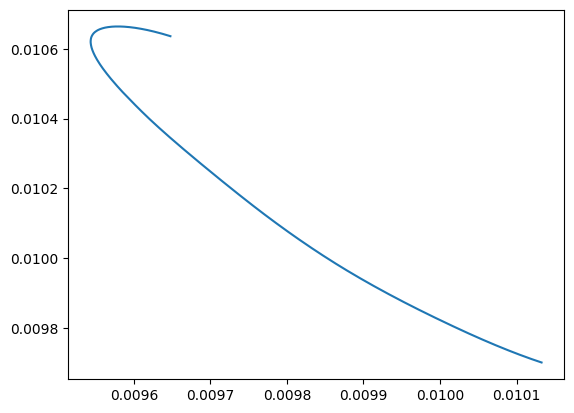

In [ ]:
vels = np.array(vels)


plt.plot(vels[:, 0], vels[:, 1])

In [ ]:
vels

NameError: name 'vels' is not defined

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim


In [ ]:
# Generate sinusoidal data
def generate_data(samples, sequence_length):
    x = np.linspace(0, 4 * np.pi, samples)
    frequencies = np.random.uniform(0.1, 1.0, size=samples)
    y = np.array([np.sin(freq * x) for freq in frequencies])
    data = []
    labels = []
    for i in range(0, samples - sequence_length):
        print(i)
        data.append(y[:, i:i + sequence_length])
        labels.append(y[:, i + sequence_length])
    return torch.tensor(data, dtype=torch.float32), torch.tensor(labels, dtype=torch.float32)

samples = 1000
sequence_length = 10
x_train, y_train = generate_data(samples, sequence_length)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

/tmp/ipykernel_600/1484594997.py:12: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:245.)
  return torch.tensor(data, dtype=torch.float32), torch.tensor(labels, dtype=torch.float32)


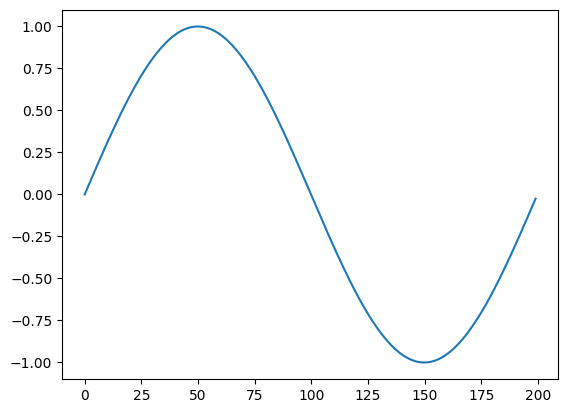

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# Create a sine wave dataset
sequence_length = 50
num_samples = 1000
sine_wave = np.sin(np.linspace(0, 10 * np.pi, num_samples))
plt.plot(sine_wave[:200])
plt.show()

def create_inout_sequences(input_data, tw):
    inout_seq = []
    L = len(input_data)
    for i in range(L-tw):
        train_seq = input_data[i:i+tw]
        train_label = input_data[i+tw:i+tw+1]
        inout_seq.append((train_seq, train_label))
    return inout_seq

train_inout_seq = create_inout_sequences(sine_wave, sequence_length)

class SineWavePredictor(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim=1, n_layers=1):
        super(SineWavePredictor, self).__init__()

        self.rnn = nn.GRU(input_dim, hidden_dim, n_layers, batch_first=True)
        self.linear = nn.Linear(hidden_dim, output_dim)

    def forward(self, x, hidden_state):
        # print(x)
        r_out, hidden_state = self.rnn(x, hidden_state)
        output = self.linear(r_out)
        return output, hidden_state

model = SineWavePredictor(1, 32, 1, 1)
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


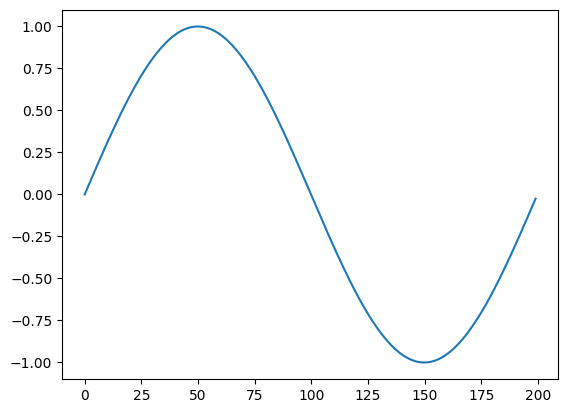

In [ ]:

class SineWavePredictor(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim=1, n_layers=1):
        super(SineWavePredictor, self).__init__()

        # Use LSTM instead of GRU
        self.rnn = nn.LSTM(input_dim, hidden_dim, n_layers, batch_first=True)
        self.linear = nn.Linear(hidden_dim, output_dim)

    def forward(self, x, hidden_state):
        # LSTM returns (r_out, (h_n, c_n)) instead of just (r_out, h_n)
        r_out, (h_n, c_n) = self.rnn(x, hidden_state)
        output = self.linear(r_out)
        return output, (h_n, c_n)

model = SineWavePredictor(1, 32, 1, 1)
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


In [ ]:
class SineWavePredictor(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim=1, n_layers=1):
        super(SineWavePredictor, self).__init__()

        # LSTM Layer
        self.rnn = nn.LSTM(input_dim, hidden_dim, n_layers, batch_first=True)
        
        # Linear layer to create initial hidden state
        self.hidden_init_layer = nn.Linear(input_dim, hidden_dim * n_layers)
        
        # Linear layer to create initial cell state
        self.cell_init_layer = nn.Linear(input_dim, hidden_dim * n_layers)
        
        # Output linear layer
        self.linear = nn.Linear(hidden_dim, output_dim)
        self.n_layers = n_layers
        self.hidden_dim = hidden_dim

    def forward(self, x, hidden_state=None):
        if hidden_state is None:
            # Create initial hidden and cell states from the first input
            initial_hidden = torch.tanh(self.hidden_init_layer(x[:, 0])).view(self.n_layers, x.size(0), self.hidden_dim)
            initial_cell = torch.tanh(self.cell_init_layer(x[:, 0])).view(self.n_layers, x.size(0), self.hidden_dim)
            hidden_state = (initial_hidden.reshape(1, self.hidden_dim), initial_cell.reshape(1, self.hidden_dim))

        # print(hidden_state, x)
        r_out, (h_n, c_n) = self.rnn(x, hidden_state)
        output = self.linear(r_out)
        return output, (h_n, c_n)

model = SineWavePredictor(1, 32, 1, 1)
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

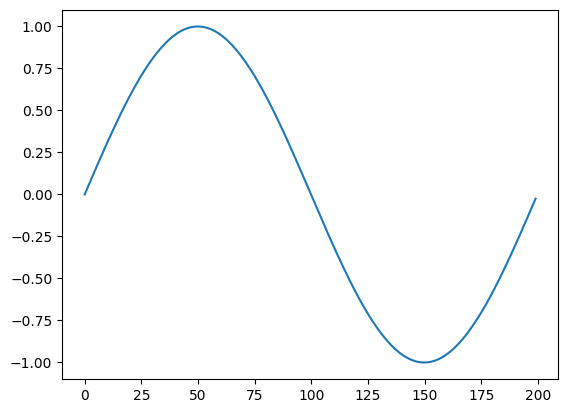

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# Create a sine wave dataset
sequence_length = 100
num_samples = 1000
sine_wave = np.sin(np.linspace(0, 10 * np.pi, num_samples))

init_length = 20

plt.plot(sine_wave[:200])
plt.show()

def create_inout_sequences(input_data, tw, init_length=10):
    inout_seq = []
    L = len(input_data)
    for i in range(L-tw-init_length):
        init_seq = input_data[i:i+init_length]
        train_seq = input_data[i+init_length:i+init_length+tw]
        train_label = input_data[i+init_length+1:i+init_length+tw+1]

        inout_seq.append((init_seq, train_seq, train_label))
    return inout_seq

train_inout_seq = create_inout_sequences(sine_wave, sequence_length, init_length)

class SineWavePredictor(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim=1, n_layers=1):
        super(SineWavePredictor, self).__init__()

        # Initial RNN for first 10 timesteps
        self.init_rnn = nn.LSTM(input_dim, hidden_dim, n_layers, batch_first=True)
        
        # Main LSTM layer
        self.rnn = nn.LSTM(input_dim, hidden_dim, n_layers, batch_first=True)
        
        # Output linear layer
        self.linear = nn.Linear(hidden_dim, output_dim)

        self.linear_out = nn.Linear(2*output_dim, output_dim)

        self.n_layers = n_layers
        self.hidden_dim = hidden_dim

    def forward(self, init_sequence, x, hidden_state=None):
        # print()
        if hidden_state is None:
            # Use the initial RNN to get the hidden and cell states from the init_sequence
            # print(init_sequence)
            _, (initial_hidden, initial_cell) = self.init_rnn(init_sequence.unsqueeze(1))
            hidden_state = (initial_hidden, initial_cell)

        r_out, (h_n, c_n) = self.rnn(x, hidden_state)
        output = self.linear(r_out)
        output = self.linear_out(torch.cat((output, x), axis=1))

        return output, (h_n, c_n)

model = SineWavePredictor(1, 32, 1, 1)
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)


In [ ]:
device='cpu'
# device = 'cuda:0'
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

model.to(device)
epochs = 100
for epoch in range(epochs):
    epoch_loss = 0
    for i,(init_seq,seq, labels) in enumerate(train_inout_seq):
        # print(init_seq, seq)
        hidden_state = None
        # print(type(seq[0]))
        # seq = torch.FloatTensor(seq[0])
        labels = torch.FloatTensor(labels, device=device)
        preds = []
        # print(seq)
        input = torch.FloatTensor(seq[0].reshape(-1, 1), device=device)
        # print(labels)
        init_seq = torch.FloatTensor(init_seq, device=device)

        # print(input)
        optimizer.zero_grad()
        for i in range(100):
            # print(init_seq)
            y_pred, hidden_state = model(init_seq, input, hidden_state)
            # print(y_pred)
            preds.append(y_pred)
            input = y_pred  # Using predicted output as the next input
            # y_pred=labels[i]

        loss = 0

        for pred, label in zip(preds, labels[:len(preds)]):
            # print(pred, label)
            loss += loss_function(pred, label)
        loss.backward()
        optimizer.step()
    epoch_loss += loss.item()
    if epoch % 2 == 0:
        print(f'Epoch {epoch} loss: {epoch_loss/len(train_inout_seq)}')



/home/tijs/.local/lib/python3.10/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 0 loss: 0.060836046392267404
Epoch 2 loss: 0.0565687049518932
Epoch 4 loss: 0.05387371236627752
Epoch 6 loss: 0.05246311534534801
Epoch 8 loss: 0.037390093369917436
Epoch 10 loss: 0.032497646591880106
Epoch 12 loss: 0.026317256147211247
Epoch 14 loss: 0.02660172852602872
Epoch 16 loss: 0.020179631493308328
Epoch 18 loss: 0.010969794880260121
Epoch 20 loss: 0.012676336548545143
Epoch 22 loss: 0.009746626290408048
Epoch 24 loss: 0.011740841648795387


KeyboardInterrupt: 

[ 0.99999876  0.9994549   0.99792272  0.99540373  0.99190044  0.98741629
  0.98195574  0.97552417  0.96812795  0.95977439  0.95047176  0.94022924
  0.92905697  0.916966    0.90396828  0.89007667  0.8753049   0.85966758
  0.84318017  0.82585898  0.80772113  0.78878457  0.76906801  0.74859095
  0.72737364  0.70543707  0.68280292  0.65949357  0.63553209  0.61094215
  0.58574808  0.55997479  0.53364776  0.50679303  0.47943716  0.4516072
  0.42333066  0.3946355   0.36555011  0.33610324  0.30632402  0.27624188
  0.24588659  0.21528814  0.18447681  0.15348305  0.12233752  0.09107102
  0.05971446  0.02829886 -0.00314473 -0.03458521 -0.06599149 -0.09733252
 -0.1285773  -0.15969493 -0.19065465 -0.22142583 -0.25197806 -0.28228112
 -0.31230504 -0.34202014 -0.37139703 -0.40040667 -0.42902035 -0.4572098
 -0.48494714 -0.51220493 -0.53895622 -0.56517457 -0.59083404 -0.61590925
 -0.64037543 -0.66420836 -0.68738449 -0.70988089 -0.73167533 -0.75274624
 -0.77307279 -0.79263489 -0.81141319 -0.82938911 -0.8

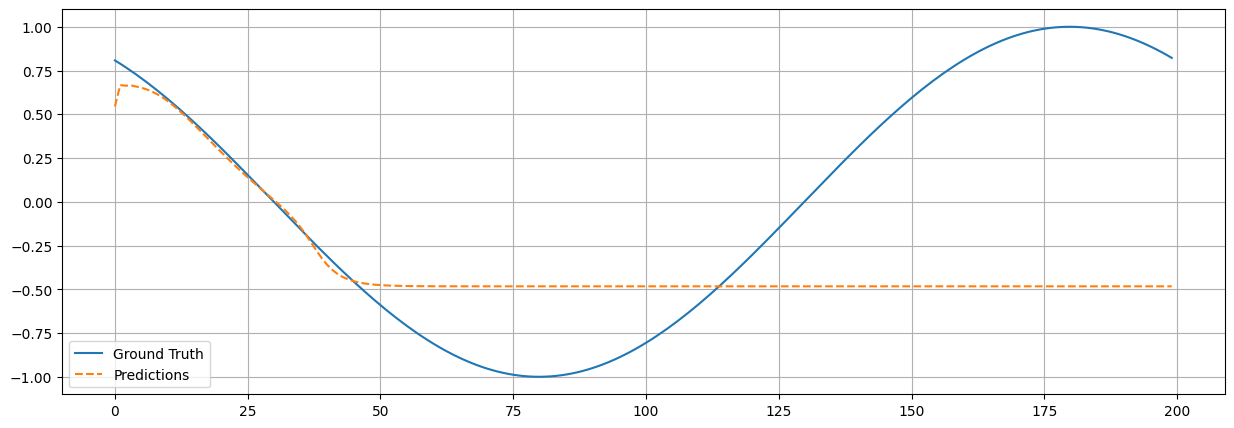

In [ ]:
# Prediction
start_point = 50
prediction_length = 200
test_points = sine_wave[start_point:prediction_length+start_point+init_length]
print(test_points)
model.eval()
hidden_state = None  # Resetting hidden state for prediction phase
outputs = []
seq = torch.FloatTensor(test_points[0].reshape(-1, 1))  # Using last prediction as input

seq = torch.FloatTensor(test_points[init_length].reshape(-1, 1))
init_seq = torch.FloatTensor(test_points[:init_length].reshape(init_length))
for i in range(0,prediction_length):
    # print(init_seq, seq)
    with torch.no_grad():
        y_test, hidden_state = model(init_seq, seq, hidden_state)
        outputs.append(y_test[0][0].item())

        seq = y_test

outputs = np.array(outputs)
plt.figure(figsize=(15,5))
plt.grid(True)
plt.plot(sine_wave[start_point+init_length:prediction_length+start_point+init_length], label='Ground Truth')
plt.plot(outputs, label='Predictions', linestyle='dashed')
plt.legend()
plt.show()


#Multiple


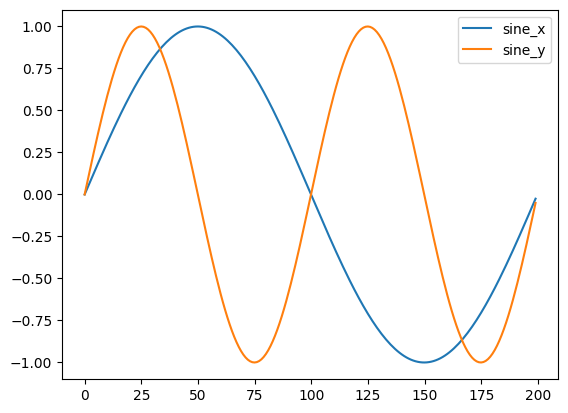

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# Create a sine wave dataset
sequence_length = 100
num_samples = 1000
init_length = 5

# Create two sine wave datasets
sine_wave_x = np.sin(np.linspace(0, 10 * np.pi, num_samples))
sine_wave_y = np.sin(np.linspace(0, 20 * np.pi, num_samples))  # For variation, I used a different frequency

# Combine the two sine waves for a 2D input
combined_sine_wave = np.stack((sine_wave_x, sine_wave_y), axis=1)

plt.plot(sine_wave_x[:200], label='sine_x')
plt.plot(sine_wave_y[:200], label='sine_y')
plt.legend()
plt.show()

def create_inout_sequences(input_data, tw, init_length=10):
    inout_seq = []
    L = len(input_data)
    for i in range(L-tw-init_length):
        init_seq = input_data[i:i+init_length]
        train_seq = input_data[i+init_length:i+init_length+tw]
        train_label = input_data[i+init_length+1:i+init_length+tw+1]

        inout_seq.append((init_seq, train_seq, train_label))
    return inout_seq

train_inout_seq = create_inout_sequences(combined_sine_wave, sequence_length, init_length)


In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# Create a sine wave dataset
sequence_length = 100
num_samples = 1000
sine_wave = np.sin(np.linspace(0, 10 * np.pi, num_samples))

init_length = 5

class SineWavePredictor(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim=2, n_layers=1):
        super(SineWavePredictor, self).__init__()

        # Initial RNN for first 10 timesteps
        self.init_rnn = nn.GRU(input_dim, hidden_dim, n_layers)
        print(input_dim, hidden_dim)
        # Main LSTM layer
        self.rnn = nn.GRU(input_dim, hidden_dim, n_layers, batch_first=True)
        
        # Output linear layer
        self.linear = nn.Linear(hidden_dim, output_dim)

        self.linear_out = nn.Linear(2*output_dim, output_dim)


        self.hidden_init_layer = nn.Linear(input_dim, hidden_dim * n_layers)
        self.cell_init_layer = nn.Linear(input_dim, hidden_dim * n_layers)

        self.n_layers = n_layers
        self.hidden_dim = hidden_dim

    def forward(self, init_sequence, x, hidden_state=None):
        # print()
        if hidden_state is None:
            # Use the initial RNN to get the hidden and cell states from the init_sequence
            # # print(init_sequence.reshape(1, 20, 2))
            # print('init?')
            # _, (initial_hidden, initial_cell) = self.init_rnn(init_sequence.reshape(init_length, 2))
            # hidden_state = (initial_hidden, initial_cell)
            _, (initial_hidden) = self.init_rnn(init_sequence.reshape(init_length, 2))
            hidden_state = (initial_hidden)
            # print(initial_cell.shape)
        
            # #         # Create initial hidden and cell states from the first input
            # initial_hidden = torch.tanh(self.hidden_init_layer(x))
            # initial_cell = torch.tanh(self.cell_init_layer(x))
            # hidden_state = (initial_hidden, initial_cell)

        r_out, (h_n) = self.rnn(x, hidden_state)
        output = self.linear(r_out)
        
        output = self.linear_out(torch.cat((output, x), axis=1))

        return output, (h_n)

model = SineWavePredictor(2, 15, 2, 1)
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)


2 15


In [ ]:
device='cpu'
# device = 'cuda:0'
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

model.to(device)
epochs = 100
for epoch in range(epochs):
    epoch_loss = 0
    for i,(init_seq,seq, labels) in enumerate(train_inout_seq):
        # print(i)
        # print(init_seq, seq)
        hidden_state = None
        # print(type(seq[0]))
        # seq = torch.FloatTensor(seq[0])

        # print(init_seq)
        # print(input)

        rotation_matrix = rotation_matrix_to_diag(init_seq[-1])[:2, :2]

        init_seq = init_seq@rotation_matrix.T
        labels = labels@rotation_matrix.T
        seq = seq@rotation_matrix.T

        labels = torch.FloatTensor(labels, device=device)
        preds = []
        # print(seq)
        input = torch.FloatTensor(seq[0].reshape(1, 2), device=device)
        # print(labels)
        init_seq = torch.FloatTensor(init_seq, device=device)
        # print(init_seq.shape)

        optimizer.zero_grad()

        for i in range(50):
            # print(init_seq)
            y_pred, hidden_state = model(init_seq, input, hidden_state)
            # print(y_pred)
            preds.append(y_pred)
            input = y_pred  # Using predicted output as the next input
            # y_pred=labels[i]

        loss = 0

        for pred, label in zip(preds, labels[:len(preds)]):
            # print(pred, label)
            loss += loss_function(pred, label) / len(pred)
        loss.backward()
        optimizer.step()
    epoch_loss += loss.item()
    if epoch % 2 == 0:
        print(f'Epoch {epoch} loss: {epoch_loss/len(train_inout_seq)}')



NameError: name 'rotation_matrix_to_diag' is not defined

(5, 2)


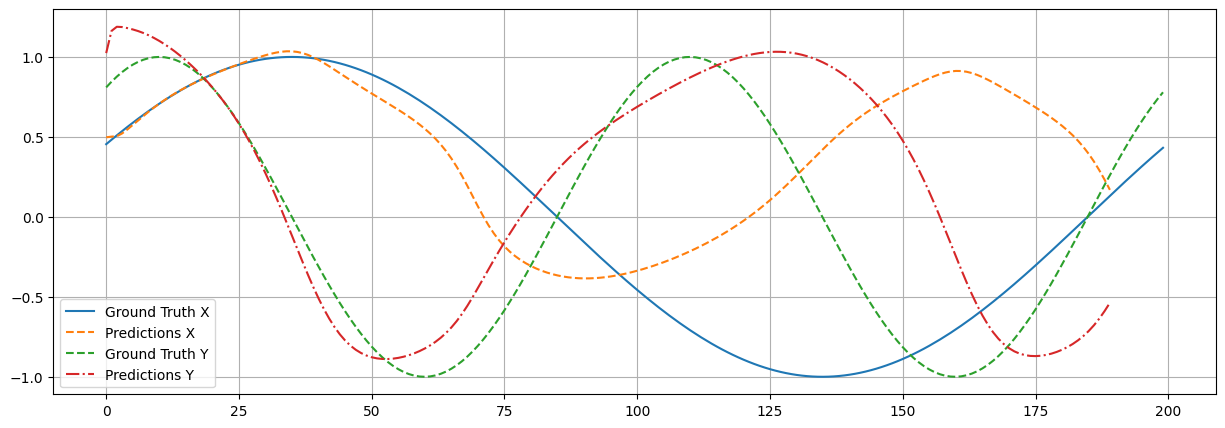

In [ ]:
# Prediction
start_point = 10
prediction_length = 200
test_points = combined_sine_wave[start_point:prediction_length + start_point + init_length]
# print(test_points)
model.eval()
hidden_state = None  # Resetting hidden state for prediction phase
outputs = []

seq = torch.FloatTensor(test_points[0].reshape(1, 2))
print(test_points[:init_length].shape)
init_seq = torch.FloatTensor(test_points[:init_length].reshape(2,init_length))


outputs_x = []  # To store the predictions of sine_wave_x
outputs_y = []  # To store the predictions of sine_wave_y

# input = torch.FloatTensor(seq[0].reshape(1, 2), device=device)
# # print(labels)
# init_seq = torch.FloatTensor(init_seq, device=device)

for i in range(start_point,prediction_length):
    # print(init_seq, seq)
    with torch.no_grad():
        y_test, hidden_state = model(init_seq, seq, hidden_state)
        outputs.append(y_test[0][0].item())

        outputs_x.append(y_test[0][0].item())  # Taking the last prediction of the sequence
        outputs_y.append(y_test[0][1].item())  # Taking the last prediction of the sequence
        
        seq = y_test

plt.figure(figsize=(15,5))
plt.grid(True)
plt.plot(sine_wave_x[start_point+init_length:prediction_length+start_point+init_length], label='Ground Truth X')
plt.plot(outputs_x, label='Predictions X', linestyle='dashed')
plt.plot(sine_wave_y[start_point+init_length:prediction_length+start_point+init_length], label='Ground Truth Y', linestyle='--')
plt.plot(outputs_y, label='Predictions Y', linestyle='-.')
plt.legend()
plt.show()


In [ ]:
outputs

array([ 0.36529252,  0.42965695,  0.44435179,  0.44091451,  0.43384027,
        0.43147907,  0.43754539,  0.4511973 ,  0.46984309,  0.49067855,
        0.51114613,  0.5294044 ,  0.54472572,  0.55756283,  0.56924504,
        0.58144432,  0.59565294,  0.61287647,  0.63352907,  0.6574015 ,
        0.68365192,  0.71091324,  0.73759675,  0.76229739,  0.78408164,
        0.80254024,  0.81767857,  0.82976651,  0.8392207 ,  0.84653294,
        0.85224247,  0.85694826,  0.86134559,  0.8662641 ,  0.87264585,
        0.88137656,  0.8929199 ,  0.90688467,  0.92189002,  0.93599808,
        0.94749308,  0.95545268,  0.95982105,  0.96112341,  0.96011013,
        0.9575038 ,  0.95387989,  0.94964182,  0.94504237,  0.94021988,
        0.9352318 ,  0.93008208,  0.92474091,  0.91915798,  0.91327226,
        0.90701747,  0.90032732,  0.89313686,  0.88538492,  0.8770138 ,
        0.8679688 ,  0.85819674,  0.84764487,  0.83625865,  0.82398218,
        0.8107596 ,  0.79653966,  0.78128189,  0.76496452,  0.74

In [ ]:
outputs

array([ 0.94175684,  0.75869703,  0.47377592,  0.39761811,  0.29253232,
        0.18207812, -0.02454518, -0.50642872, -0.55150867, -0.4186334 ,
       -0.1283164 ,  1.12730038,  0.79816222,  0.36011595,  0.25359905,
        0.09493798, -0.26194102, -0.63778794, -0.47673303, -0.33036333,
        0.35802448,  1.55371642,  0.51815152,  0.28892094,  0.15304923,
       -0.12040909, -0.61817622, -0.50634265, -0.38322026,  0.0546127 ,
        1.48799217,  0.62726116,  0.30446601,  0.1760751 , -0.07092784,
       -0.58216387, -0.52561891, -0.40302598, -0.04856104,  1.31559849,
        0.7037245 ,  0.33198279,  0.21795022,  0.02417254, -0.43131328,
       -0.58909667, -0.44546568, -0.23392385,  0.80284739,  1.06297839,
        0.41907942,  0.30216223,  0.17631578, -0.05609636, -0.55720854,
       -0.53415316, -0.40988916, -0.08406007,  1.23776186,  0.74016523,
        0.34361625,  0.23355603,  0.05632403, -0.35861021, -0.61426973,
       -0.46025944, -0.2839483 ,  0.5960238 ,  1.30366576,  0.46

In [ ]:
# Prediction
test_points = sine_wave[:sequence_length].tolist()
model.eval()
hidden_state = None  # Resetting hidden state for prediction phase

for i in range(200):
    seq = torch.FloatTensor(test_points[-sequence_length:]).view(1, sequence_length, 1)
    with torch.no_grad():
        y_test, hidden_state = model(seq, hidden_state)
        test_points.append(y_test[0][0].item())

plt.figure(figsize=(15,5))
plt.grid(True)
plt.plot(sine_wave[:sequence_length + 200], label='Ground Truth')
plt.plot(test_points[sequence_length:], label='Predictions', linestyle='dashed')
plt.legend()
plt.show()

AssertionError: LSTM: Expected input to be 2-D or 3-D but received 4-D tensor

# Setup

In [1]:

class Args():
    def __init__(self, args = {'data_directory':'./bubble-data', 'remesh_velocity':True, 'target_acceleration': False, 'learning_rate': 0.0001}) -> None:
        
        self.data_directory = args['data_directory']
        self.remesh_velocity = args['remesh_velocity']
        self.target_acceleration = args['target_acceleration']
        self.learning_rate = args['learning_rate']
        self.epochs = 18000

args = Args()

In [2]:
from experimental.remesh.bubble import Bubble, rotation_matrix_to_y_axis, rotation_matrix_to_diag
from experimental.remesh.sequence_dataset import BubbleSequenceDataset, BubbleSequence
# from .transforms import AdditiveNoiseTransform, RelativeNoiseTransform

import torch
import torch.nn as nn

from loky import get_reusable_executor

import numpy as np

# Thesis


In [ ]:
import loky
from loky import get_reusable_executor

executor = get_reusable_executor(max_workers=1, timeout=2)
steps = 1

def worker(bubble_n, sequence,rotation_matrix, steps=steps):
    """Function to run in a separate process."""
    sequence = BubbleSequence(args.data_directory,
    sequence,
    remesh_velocity=args.remesh_velocity,
    target_acceleration=args.target_acceleration,
    center_prediction = True
    )

    # sequence.set_rotation_matrix(rotation_matrix)

    # print('sequece')
    return [sequence[n].centroid()-sequence[n-1].centroid() for n in range(0, bubble_n, steps) if n> 0]


def get_bubble(bubble_n,sequence, rotation_matrix=np.diag([1.0, 1.0,1.0])):

    future = executor.submit(worker, bubble_n, sequence, rotation_matrix)

    # Wait for the result and print it
    result = future.result() 
    # print(result)
    return result

data_og = [np.array(get_bubble(2000, i)) for i in [1,5]]

KeyboardInterrupt: 

In [ ]:
class WelfordNormalizer:
    def __init__(self):
        self.k = 1
        self.M = torch.tensor([-3.5681e-09,  1.2434e-06,  2.8165e-05])
        self.S = torch.zeros(3)

        self.active = False
    
    def update(self, x):
        # print('update')

        if self.k >= 1000:
            return
        self.k += 1
        oldM = self.M.clone()
        self.M += (x - self.M) / self.k
        self.S += (x - oldM) * (x - self.M)
        self.active=True
    
    def mean(self):
        return self.M

    def variance(self):
        if self.k > 1:
            return self.S / (self.k - 1)
        else:
            return torch.full((3,), float('nan'))

    def std_dev(self):
        return torch.sqrt(self.variance())

    def normalize(self, x):
        return (x - self.mean()) / self.std_dev()

    def inverse(self, x):
        return x * self.std_dev() + self.mean()


def rotate_to_previous(x, prev_x):
    # print(x)
    rotation_matrix = rotation_matrix_to_y_axis(prev_x)[:2, :2]

    return rotation_matrix@x
 
normalizer = WelfordNormalizer()

for i,x in enumerate(data_og[0]):
    # print(x)

    normalizer.update(x)

    # if i > 0:
    #     # print(torch.tensor(rotate_to_previous(x[:2].numpy(), data_og[0][i-1][:2].numpy())[0]))
    #     normalizer.update(torch.tensor(rotate_to_previous(x[:2].numpy(), data_og[0][i-1][:2].numpy())[0]))

data = np.array([np.array([normalizer.normalize(xi).numpy() for xi in x]) for x in data_og])
# data.apply(lambda x: normalizer(x))

NameError: name 'data_og' is not defined

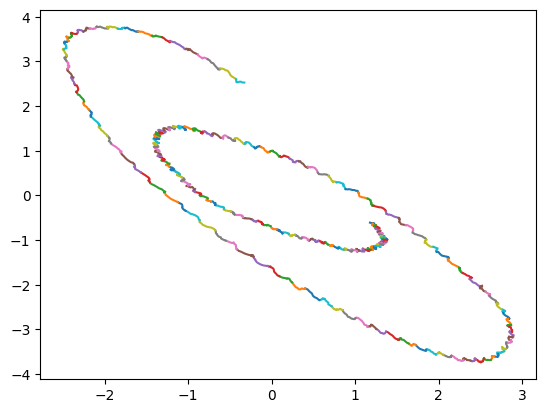

1999
1000


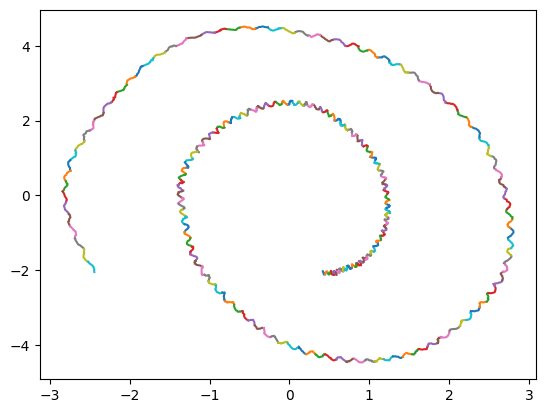

1999
1000


In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

steps = 10
# Create a sine wave dataset
sequence_length = int(10000/steps)
num_samples = 1000
init_length = int(100/steps)

sequences = []

for datai in  data:
    # Create two sine wave datasets
    # print(datai)
    sine_wave_x = datai[:, 0]
    sine_wave_y = datai[:, 1] # For variation, I used a different frequency

    # Combine the two sine waves for a 2D input
    combined_sine_wave = np.stack((sine_wave_x, sine_wave_y), axis=1)
    

    # rotation_matrix = rotation_matrix_to_diag(combined_sine_wave[0])[:2,:2]
    # print(rotation_matrix)

    # combined_sine_wave = combined_sine_wave@rotation_matrix.T
    # plt.plot(sine_wave_x[:1000], label='sine_x')
    # plt.plot(sine_wave_y[:1000], label='sine_y')
    # plt.plot(combined_sine_wave[:1000, 0], label='sine_x_rot')
    for i in range(0, 3000, 10):
        plt.plot(combined_sine_wave[i:i+11,1], combined_sine_wave[i:i+11, 0], label='sine_y_rot')
    # plt.legend()
    plt.show()

    # combined_sine_wave = rotation_matrix

    def create_inout_sequences(input_data, tw, init_length=10, steps=steps):
        inout_seq = []
        L = len(input_data) 
        # tw = int(tw/steps)
        print(L)
        print(tw)
        # init_length = int(init_length/steps)
        for i in range(0, L-tw-init_length, 10):
            # print(i,L-tw-init_length, tw, init_length)
            init_seq = input_data[i:i+init_length]
            train_seq = input_data[i+init_length:i+init_length+tw]
            train_label = input_data[i+init_length+1:i+init_length+tw+1]
 
            inout_seq.append((init_seq, train_seq, train_label))
        return inout_seq

    train_inout_seq = create_inout_sequences(combined_sine_wave, sequence_length, init_length)
    sequences.append(train_inout_seq)

In [ ]:
sequences[0][0][1].shape

(300, 2)

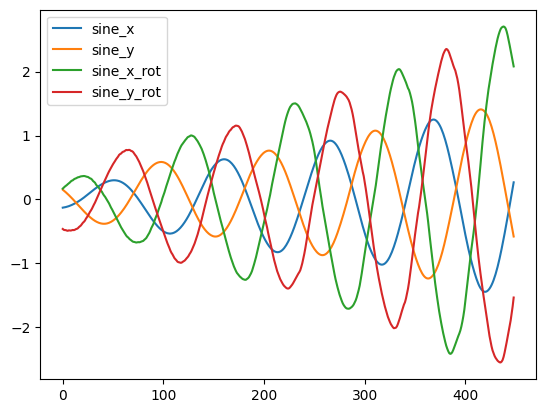

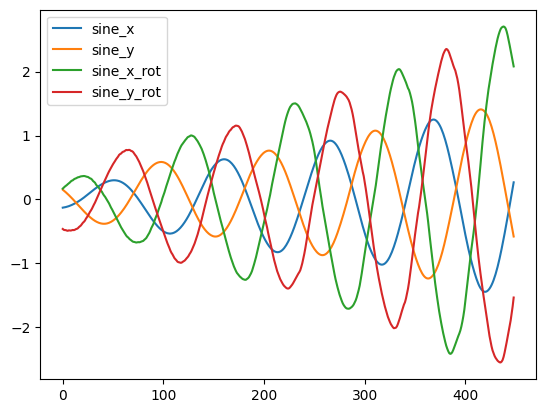

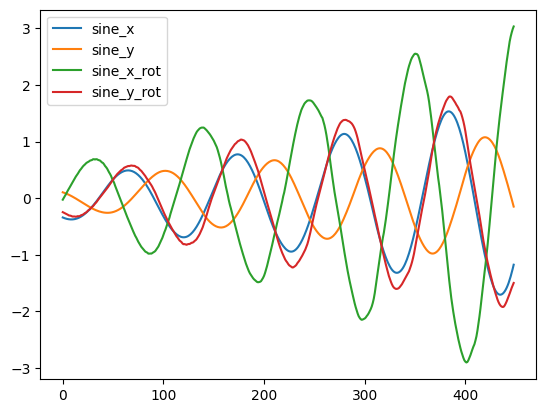

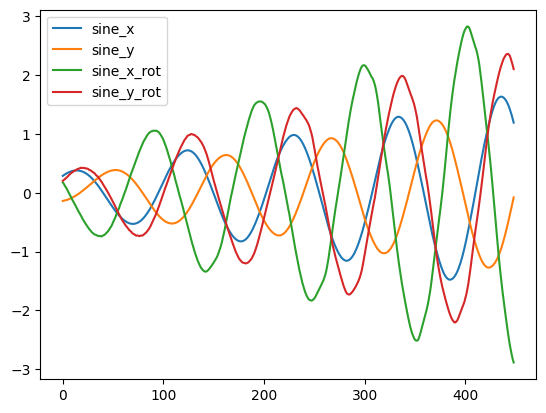

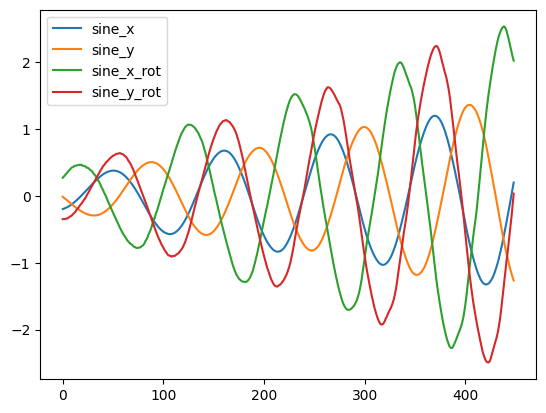

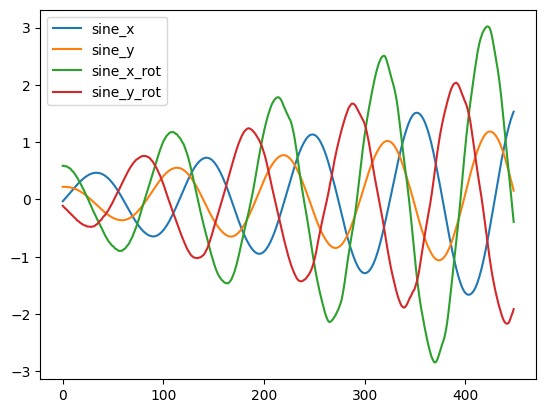

In [ ]:
sequences = []
def moving_average(data, window_size):
    """Compute a simple moving average."""
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

for datai in data:
    # print(datai)
    
    # Compute the moving average for the previous 5 timesteps
    sine_wave_x_avg = moving_average(datai[1:, 0], 50)
    sine_wave_y_avg = moving_average(datai[1:, 1], 50)

    # Compute the difference between the current timestep and the averaged previous 5 timesteps
    sine_wave_x_diff = datai[50:, 0] - sine_wave_x_avg
    sine_wave_y_diff = datai[50:, 1] - sine_wave_y_avg
    # print(sine_wave_x_diff)
    # Combine the two sine wave differences for a 2D input
    combined_sine_wave_diff = np.stack((sine_wave_x_diff, sine_wave_y_diff), axis=1)

    # rotation_matrix = rotation_matrix_to_diag(combined_sine_wave[0])[:2,:2]
    # print(rotation_matrix)

    # combined_sine_wave = combined_sine_wave@rotation_matrix.T
    plt.plot(sine_wave_x_avg[:1000], label='sine_x')
    plt.plot(sine_wave_y_avg[:1000], label='sine_y')
    plt.plot(combined_sine_wave_diff[:1000, 0], label='sine_x_rot')
    plt.plot(combined_sine_wave_diff[:1000,1], label='sine_y_rot')
 
    plt.legend()
    plt.show()

    # def create_inout_sequences(input_data, tw, init_length=10):
    #     inout_seq = []
    #     L = len(input_data)
    #     for i in range(L-tw-init_length):
    #         init_seq = input_data[i:i+init_length]
    #         train_seq = input_data[i+init_length:i+init_length+tw]
    #         train_label = input_data[i+init_length+1:i+init_length+tw+1]
    #         inout_seq.append((init_seq, train_seq, train_label))
    #     return inout_seq

    # train_inout_seq = create_inout_sequences(combined_sine_wave_diff, sequence_length, init_length)
    # sequences.append(train_inout_seq)


In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# Create a sine wave dataset
sequence_length = 100
num_samples = 1000
sine_wave = np.sin(np.linspace(0, 10 * np.pi, num_samples))


class SineWavePredictor(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim=2, n_layers=1):
        super(SineWavePredictor, self).__init__()

        # Initial RNN for first 10 timesteps
        self.init_rnn = nn.LSTM(input_dim, hidden_dim, n_layers)
        # Main LSTM layer
        self.rnn = nn.LSTM(input_dim, hidden_dim, n_layers, batch_first=True)
        
        # Output linear layer
        self.linear = nn.Linear(hidden_dim, output_dim)

        self.linear_out = nn.Linear(2*output_dim, 2*output_dim)
        self.linear_out2 = nn.Linear(2*output_dim, output_dim)


        self.hidden_init_layer = nn.Linear(input_dim, hidden_dim * n_layers)
        self.cell_init_layer = nn.Linear(input_dim, hidden_dim * n_layers)

        self.n_layers = n_layers
        self.hidden_dim = hidden_dim

        self.relu = torch.nn.LeakyReLU()

    def forward(self, init_sequence, x, hidden_state=None):
        # print()
        if hidden_state is None:
            # Use the initial RNN to get the hidden and cell states from the init_sequence
            # # print(init_sequence.reshape(1, 20, 2))
            # print('init?')
            _, (initial_hidden, initial_cell) = self.init_rnn(init_sequence.reshape(-1, 2))
            hidden_state = (initial_hidden, initial_cell)
            # _, (initial_hidden) = self.init_rnn(init_sequence.reshape(init_length, 2))
            # hidden_state = (initial_hidden)
            # print(initial_cell.shape)
        
            # #         # Create initial hidden and cell states from the first input
            # initial_hidden = torch.tanh(self.hidden_init_layer(x))
            # initial_cell = torch.tanh(self.cell_init_layer(x))
            # hidden_state = (initial_hidden, initial_cell)

        r_out, (h_n, h_c) = self.rnn(x, hidden_state)
        # r_out.relu_()
        output = self.linear(r_out)
        # output.relu_()
        output = self.relu(output)
        output = self.linear_out(torch.cat((output, x), axis=1))
        
        output = self.relu(output)


        output= self.linear_out2(output)
        return output, (h_n, h_c)

model = SineWavePredictor(2, 256, 2, 1)
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)


In [ ]:
model = torch.load('trained_model')
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

model.train()

SineWavePredictor(
  (init_rnn): LSTM(2, 256)
  (rnn): LSTM(2, 256, batch_first=True)
  (linear): Linear(in_features=256, out_features=2, bias=True)
  (linear_out): Linear(in_features=4, out_features=4, bias=True)
  (linear_out2): Linear(in_features=4, out_features=2, bias=True)
  (hidden_init_layer): Linear(in_features=2, out_features=256, bias=True)
  (cell_init_layer): Linear(in_features=2, out_features=256, bias=True)
  (relu): LeakyReLU(negative_slope=0.01)
)

In [ ]:
from experimental.remesh.vectorAdam import VectorAdam

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
# optimizer = VectorAdam([{'params': model.parameters(), 'axis': -1}], lr=.01)


In [ ]:
device='cpu'
# device = 'cuda:0'


model.to(device)
epochs = 100
for epoch in range(epochs):
    epoch_loss = 0
    for train_inout_seq in sequences:
        for i,(init_seq,seq, labels) in enumerate(train_inout_seq):
            # print(i)
            # print(init_seq, seq)
            hidden_state = None
            # print(type(seq[0]))
            # seq = torch.FloatTensor(seq[0])

            # print(init_seq[-1])
            rotation_matrix = rotation_matrix_to_y_axis(init_seq[-1])[:2, :2]
            # print(rotation_matrix)

            init_seq = init_seq@rotation_matrix.T
            labels = labels@rotation_matrix.T
            seq = seq@rotation_matrix.T
            # print(init_seq)
            # print(init_seq)
            labels = torch.FloatTensor(labels, device=device)
            preds = []
            # print(seq)
            input = torch.FloatTensor(seq[0].reshape(1, 2), device=device)
            # print(labels)
            init_seq = torch.FloatTensor(init_seq, device=device)

            optimizer.zero_grad()
            for i in range(100):
                # print(init_seq)
                y_pred, hidden_state = model(init_seq, input, hidden_state)
                # print(y_pred)
                preds.append(y_pred)
                input = y_pred  # Using predicted output as the next input
                y_pred=labels[i]

            # print(preds)
            # raise Exception
            loss = 0

            for pred, label in zip(preds, labels[:len(preds)]):
                # print(pred, label)
                # print(loss_function(pred, label), loss_function(pred.view(2), label))
                loss += loss_function(pred, label) / len(pred)
            loss.backward()
            # torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1)
            optimizer.step()
            epoch_loss += loss.item()
    if epoch % 2 == 0:
        print(f'Epoch {epoch} loss: {epoch_loss/len(train_inout_seq)}')



/home/tijs/.local/lib/python3.10/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([2])) that is different to the input size (torch.Size([1, 2])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 0 loss: 446.80318691855985


KeyboardInterrupt: 

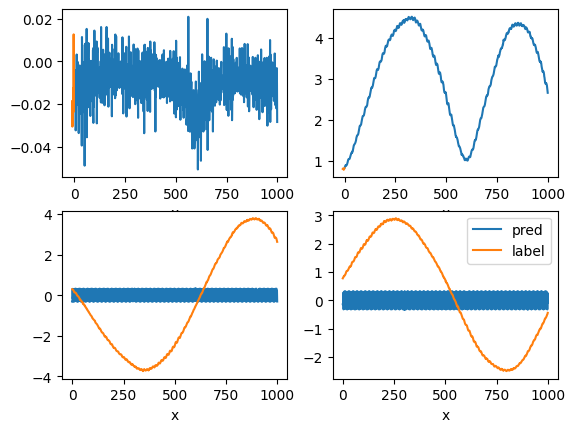

KeyboardInterrupt: 

In [ ]:
device='cpu'
# device = 'cuda:0'

def rotate_to_previous(x, prev_x):
    rotation_matrix = rotation_matrix_to_y_axis(prev_x)[:2, :2]
    return rotation_matrix@x, rotation_matrix

smooth_k = 1
model.to(device)
epochs = 500
for epoch in range(epochs):
    epoch_loss = 0
    preds = []



    for j, train_inout_seq in enumerate(sequences):

        for i,(init_seq,seq, labels) in enumerate(train_inout_seq):

            hidden_state = None



            labels = torch.FloatTensor(seq, device=device)
            # print(len(labels))
            if len(preds) != 0:
                old_preds_pure = preds_pure
                old_preds = preds
                old_init_seq = init_seq

            preds = []
            preds_pure = []
            og_start = torch.FloatTensor(init_seq[-1], device=device)
        

            rot_init_seq = np.ones((init_seq.shape[0]-1, 2))
            vels = []

            for i, i_s in enumerate(init_seq):
                if i > 0:
                    rot_init_seq[i-1, :] = rotate_to_previous(i_s, np.mean(vels[ -smooth_k:], axis=0).reshape(2))[0]
                vels.append(i_s)


            labels_rot = [rotate_to_previous(l.numpy(), np.mean(np.vstack((vels, labels[:i].numpy()))[-smooth_k:], axis=0).reshape(2))[0]  for i,l in enumerate(labels)]
            # print(init_seq)

            init_seq = torch.FloatTensor(rot_init_seq, device=device)
            input = init_seq[-1].reshape(1, 2)


            # raise Exception
            # print(init_seq, labels_rot)
            old_init_seq= init_seq

            # print(init_seq)
            # print(input)
            optimizer.zero_grad()
            # print(init_seq.shape)
            for i in range(1000):
       
                y_pred, hidden_state = model(init_seq, input, hidden_state)

                
                rot_x, rotation_matrix = rotate_to_previous(y_pred.detach().numpy()[0], np.mean(vels[ -smooth_k:], axis=0).reshape(2))


                preds.append(torch.tensor(rotation_matrix.T).float()@y_pred[0])
                preds_pure.append(y_pred[0])
                # print(vels)
                # print()
                # print(vels[ -smooth_k:])
                if i % 300 == 0:

                    vels.append(labels[i].detach().numpy())
                    y_pred=torch.FloatTensor(labels_rot[i]).reshape(1,2)
                else:

                    vels.append(preds[-1].detach().numpy())
                # print(y_pred)
                input = y_pred  # Using predicted output as the next input

            loss = 0
            # print(labels_rot)
            # print(len(preds_pure))
            # print(len(labels_rot[:len(preds)]))

            for pred, label in zip(preds_pure, labels_rot[:len(preds)]):
                # print(pred*torch.tensor([10, 1]), torch.tensor(label)*torch.tensor([10, 1]))
                loss += loss_function(pred*torch.tensor([50, 1]), torch.tensor(label).float()*torch.tensor([50, 1])) / len(pred)
            # print('loss', loss)
         
            loss.backward()
            # torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1)
            optimizer.step()
            epoch_loss += loss.item()

        if epoch % 5 == 0 and j in [0, 4]:
            preds_pure = torch.stack(old_preds_pure)
            labels_rot = np.array(labels_rot)


            predz = torch.stack(old_preds)
            ax = plt.subplot(2,2,1)
            # plt.plot(labels[:len(preds), 0], labels[:len(preds), 1], label='label')
            # ax.plot(preds_pure[:, 0].detach().numpy(), label='pred')
            ax.plot(labels_rot[:, 0], label='label')
            ax.plot(range(-9, 0), old_init_seq[:, 0], label='init')
            ax.set_xlabel('x')
            
            
            ax = plt.subplot(2,2,2)

            # ax.plot(preds_pure[:, 1].detach().numpy(), label='pred')
            ax.plot(labels_rot[:, 1], label='label')
            ax.plot(range(-9, 0),old_init_seq[:, 1], label='init')
            ax.set_xlabel('x')

            ax = plt.subplot(2,2,3)
            # plt.plot(labels[:len(preds), 0], labels[:len(preds), 1], label='label')
            ax.plot(predz[:, 0].detach().numpy(), label='pred')
            ax.plot(labels[:, 0], label='label')
            ax.set_xlabel('x')
            
            
            ax = plt.subplot(2,2,4)

            ax.plot(predz[:, 1].detach().numpy(), label='pred')
            ax.plot(labels[:, 1], label='label')
            ax.set_xlabel('x')
            plt.legend()
            plt.show()
            # print(init_seq)
            # print(labels_rot[:10])
            torch.save(model, 'trained_model')
            
    if epoch % 1 == 0:
        print(f'Epoch {epoch} loss: {epoch_loss/len(train_inout_seq)}')


        print()



In [ ]:
labels

torch.Size([200, 2])

In [ ]:
torch.save(model, 'trained_model')

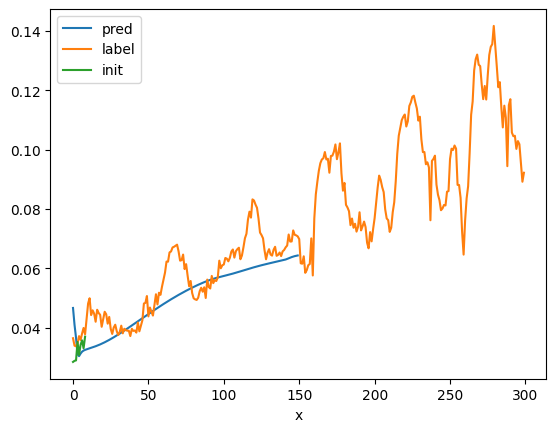

In [ ]:
preds_pure = torch.stack(old_preds_pure)
labels_rot = np.array(labels_rot)
# plt.plot(labels[:len(preds), 0], labels[:len(preds), 1], label='label')
plt.plot(preds_pure[:, 0].detach().numpy(), label='pred')
plt.plot(labels_rot[:, 0], label='label')
plt.plot(old_init_seq[:, 0], label='init')
plt.xlabel('x')
plt.legend()

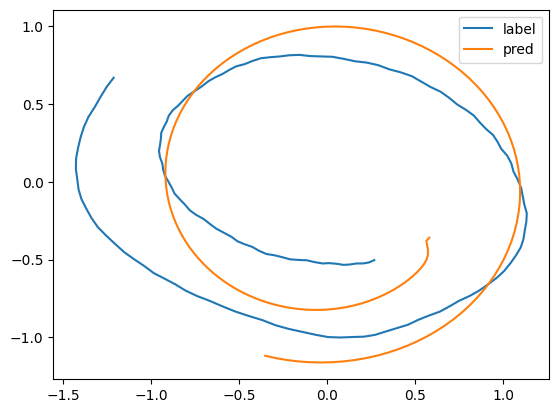

In [ ]:
preds = torch.stack(old_preds)


plt.plot(labels[:len(preds), 0], labels[:len(preds), 1], label='label')
plt.plot(preds[:len(preds), 0].detach().numpy(), preds[:len(preds), 1].detach().numpy(), label='pred')
plt.legend()

In [ ]:
torch.save(model, 'test_model')

/tmp/ipykernel_596/2059961889.py:1: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  test_data = [np.array(get_bubble(3000, i)) for i in [6]]
/tmp/ipykernel_596/2059961889.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  test_data = [np.array(get_bubble(3000, i)) for i in [6]]


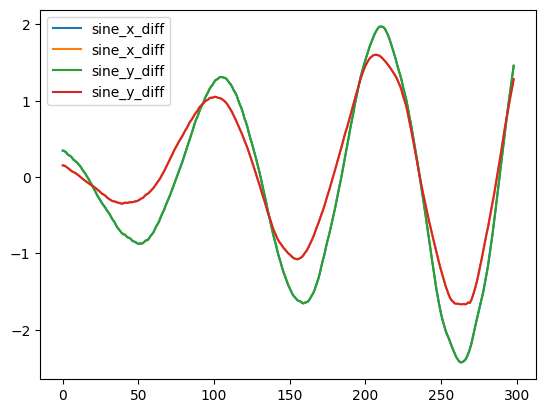

In [ ]:

test_data = [np.array(get_bubble(3000, i)) for i in [6]]

test_data = np.array([np.array([normalizer.normalize(xi).numpy() for xi in x]) for x in test_data])

# Create two sine wave datasets
datai = test_data[0]
sine_wave_x = datai[:, 0]
sine_wave_y = datai[:, 1] # For variation, I used a different frequency

# Combine the two sine waves for a 2D input
combined_sine_wave_train  = np.stack((sine_wave_x, sine_wave_y), axis=1)


plt.plot(combined_sine_wave_train[:3000], label='sine_x_diff')
plt.plot(combined_sine_wave_train[:3000], label='sine_y_diff')
plt.legend()
plt.show()


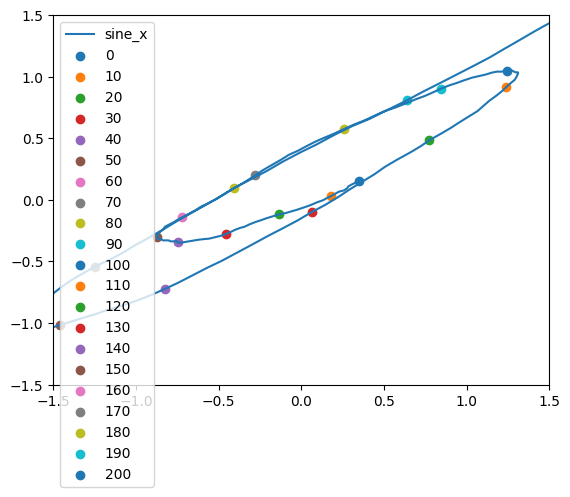

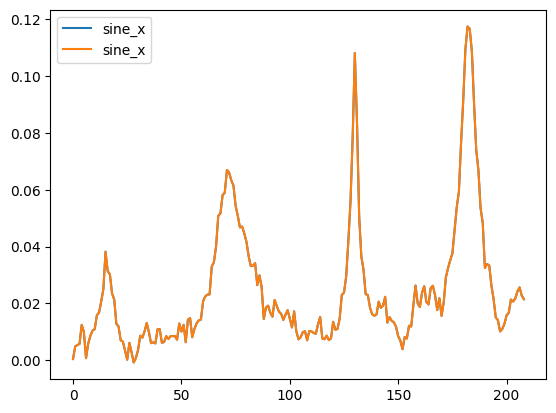

In [ ]:
# Prediction

smooth_k = 1
def moving_average(data, window_size=10):
    print(data)
    """Compute a simple moving average for 2D vectors."""
    data_x = [x[0] for x in data]
    data_y = [x[1] for x in data]

    avg_x = np.convolve(data_x, np.ones(window_size)/window_size, mode='valid')
    avg_y = np.convolve(data_y, np.ones(window_size)/window_size, mode='valid')
    print(avg_x)
    return list(zip(avg_x, avg_y))


def rotate_to_previous(x, prev_x):
    # print(x, prev_x)
    rotation_matrix = rotation_matrix_to_y_axis(prev_x)[:2, :2]
    # print(rotation_matrix@x, rotation_matrix@prev_x)
    # print()
    return rotation_matrix@x, rotation_matrix


start_point = 0
prediction_length = 200

test_points_og = combined_sine_wave_train[start_point:prediction_length + start_point + init_length]


test_points = np.array([rotate_to_previous(tp, np.mean(test_points_og[max(i-smooth_k, 0):i], axis=0))[0] for i,tp in enumerate(test_points_og) if i > 0])
# test_points = np.array([rotate_to_previous(tp, test_points_og[i-1] - test_points_og[i-smooth_k])[0] for i,tp in enumerate(test_points_og) if i > 0])
# print(test_points)

start = [[0,0]]
for tpo in test_points_og:
    start.append(    start[-1] + tpo)


plt.plot(test_points_og[:1000, 0], test_points_og[:1000, 1], label='sine_x')

for i in range(0, len(test_points_og), 10):
    plt.scatter(test_points_og[i, 0],test_points_og[i, 1], label=i)
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)

# plt.plot(sine_wave_y[:1000], label='sine_y')
plt.legend()
plt.show()


plt.plot(test_points[:1000, 0], label='sine_x')
plt.plot(test_points[:1000, 0], label='sine_x')
# plt.xlim(-1.5, 1.5)
# plt.ylim(-1.5, 1.5)

# plt.plot(test_points[:1000, 1], label='sine_y')
plt.legend()
plt.show()

tensor([[-0.0183,  0.8503],
        [-0.0215,  0.8658],
        [-0.0191,  0.8689],
        [-0.0125,  0.8687],
        [-0.0159,  0.8842],
        [-0.0174,  0.8850],
        [-0.0159,  0.8778],
        [-0.0139,  0.8790],
        [-0.0198,  0.8766]])
[[ 0.00443177  0.35618956]
 [ 0.00091671  0.32631392]
 [ 0.00073381  0.30533575]
 [ 0.0069693   0.29152376]
 [-0.00139893  0.26764355]
 [-0.00823703  0.23864378]
 [ 0.00516908  0.22196816]
 [ 0.00324573  0.20236945]
 [ 0.00284746  0.17876731]]
[-0.07733536511659622, -0.15277031064033508, -0.217534601688385, -0.2967101037502289, -0.35654571652412415, -0.4500076174736023, -0.5018370747566223, -0.5780171751976013, -0.6383296251296997, -0.7225555777549744, -0.7939284443855286, -0.8812729120254517, -0.9601173400878906, -1.0404103994369507, -1.1027381420135498, -1.157240390777588, -1.2004916667938232, -1.2440704107284546, -1.285372018814087, -1.32894766330719, -1.3711496591567993, -1.4134776592254639, -1.4525665044784546, -1.4884165525436401, 

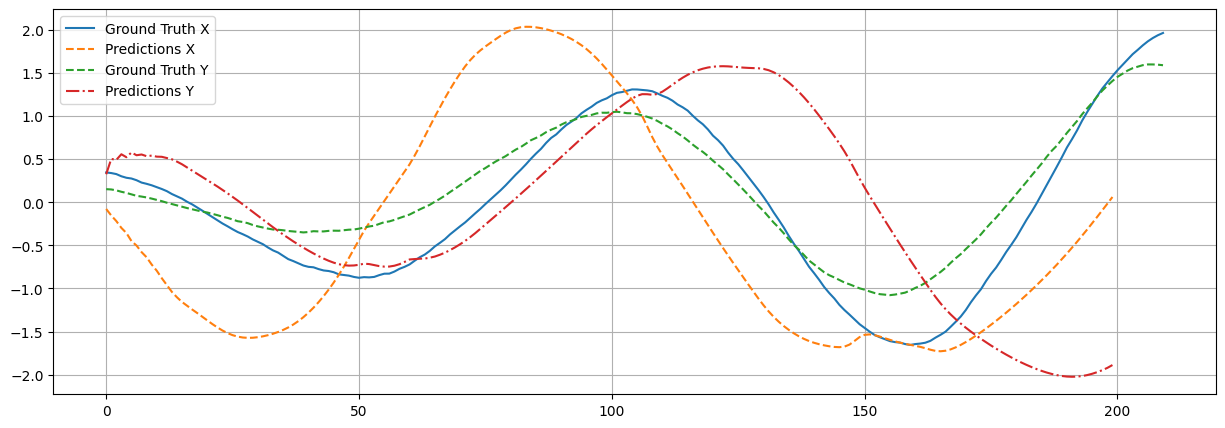

In [ ]:


# print(test_points[init_length])
# rotation_matrix = rotation_matrix_to_y_axis(test_points[init_length-1])[:2,:2]
# test_points = test_points@rotation_matrix.T
# print(test_points[:init_length + 10])
model.eval()
hidden_state = None  # Resetting hidden state for prediction phase
og_outputs = []





preds = []
preds_pure = []


preds = []
preds_pure = []
og_start = init_seq[-1]


# labels_rot = [rotate_to_previous(l.numpy(), labels[i-1])[0]  if i > 0 else rotate_to_previous(l.numpy(), seq[0])[0] for i,l in enumerate(labels)]
# print(seq)
# print(labels)
rot_init_seq = np.ones((init_length-1,2))
vels = []

for i, i_s in enumerate(test_points[:init_length].reshape(init_length,2)):
    if i > 0:
        rot_init_seq[i-1, :] = rotate_to_previous(i_s, np.mean(vels[ -smooth_k:], axis=0).reshape(2))[0]
    vels.append(i_s)


# labels_rot = [rotate_to_previous(l.numpy(), np.mean(np.vstack((vels, labels[:i].numpy()))[-smooth_k:], axis=0).reshape(2))[0]  if i > 0 else rotate_to_previous(l.numpy(), np.mean(np.vstack((vels, seq[0]))[-smooth_k:], axis=0).reshape(2))[0]  for i,l in enumerate(labels)]
print(init_seq)

init_seq = torch.FloatTensor(rot_init_seq, device=device)
# print(vels)


seq = torch.FloatTensor(rot_init_seq[-1]).reshape(1,2)
print(rot_init_seq)

outputs_x = []  # To store the predictions of sine_wave_x
outputs_y = []  # To store the predictions of sine_wave_y

# input = torch.FloatTensor(seq[0].reshape(1, 2), device=device)
# # print(labels)
# init_seq = torch.FloatTensor(init_seq, device=device)
preds = []
for i in range(start_point,prediction_length):
    # print(init_seq, seq)
    with torch.no_grad():
        y_test, hidden_state = model(init_seq, seq, hidden_state)


        # if len(og_outputs) > 0:

        #     rot_x, rotation_matrix = rotate_to_previous(y_test.detach().numpy()[0], og_outputs[-1])
        # else:
        #     rot_x, rotation_matrix = rotate_to_previous(y_test.detach().numpy()[0], init_seq[-1])

        # print(y_test.detach().numpy()[0], y_test)
        if len(vels) > 0:
            
            rot_x, rotation_matrix = rotate_to_previous(y_test.detach().numpy()[0], np.mean(vels[ -smooth_k:], axis=0).reshape(2))
        else:
            rot_x, rotation_matrix = rotate_to_previous(y_test.detach().numpy()[0], np.mean(vels[ -smooth_k:], axis=0).reshape(2))


        preds.append(torch.tensor(rotation_matrix.T).float()@y_test[0])
        preds_pure.append(y_test[0])
        # print(vels)
        # print()
        # vels.append(labels[i].detach().numpy())
        # y_pred=torch.FloatTensor(labels_rot[i]).reshape(1,2)

        vels.append(preds[-1].detach().numpy())

        input = y_pred  # Using predicted output as the next input


        og_pred = torch.tensor(rotation_matrix.T).float()@y_test[0]
        # print(y_test[0], og_pred)
        # print(rotation_matrix)
        og_outputs.append(og_pred.detach().numpy())
        # preds.append(torch.tensor(rotation_matrix.T).float()@y_pred[0])
        # preds_pure.append(y_pred[0])
        # input = y_pred  # Using predicted output as the next input
        # y_pred=labels[i]
        # print(og_pred)
        # # y_test = torch.tensor(rotation_matrix.T).float()@y_test[0]
        # print(y_test)

        outputs_x.append(og_pred[0].item())  # Taking the last prediction of the sequence
        outputs_y.append(og_pred[1].item())  # Taking the last prediction of the sequence
        
        seq = y_test.reshape(1, 2)

og_outputs = np.array(og_outputs)
print(outputs_x)
plt.figure(figsize=(15,5))
plt.grid(True)
plt.plot(test_points_og[:, 0], label='Ground Truth X')
plt.plot(outputs_x, label='Predictions X', linestyle='dashed')
plt.plot(test_points_og[:, 1], label='Ground Truth Y', linestyle='--')
plt.plot(outputs_y, label='Predictions Y', linestyle='-.')
plt.legend()
plt.show()


In [ ]:
torch.save(model, 'model')

In [ ]:
# plt.plot(test_points_og[:, 0], label='Ground Truth X')
# plt.plot(outputs_x, label='Predictions X', linestyle='dashed')
plt.plot(test_points_og[:, 1], test_points_og[:, 0], label='Ground Truth Y', linestyle='--')
plt.plot(outputs_y, outputs_x,label='Predictions Y', linestyle='-.')

plt.plot(outputs_y[0], outputs_x[0],label='Predictions Y', linestyle='-.')

In [ ]:
preds_pure = np.array([pp.detach().numpy() for pp  in preds_pure])

plt.plot(preds_pure[:, 0])

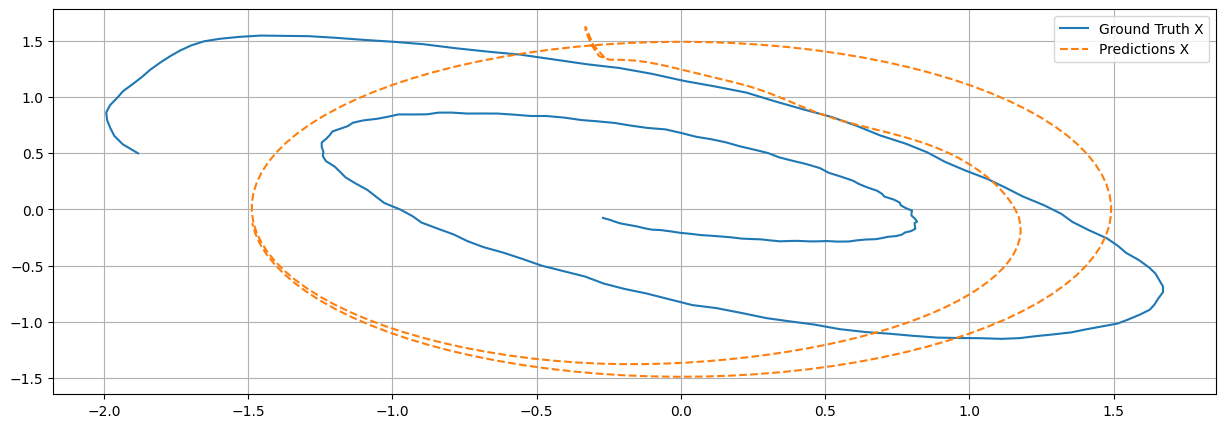

In [ ]:
plt.figure(figsize=(15,5))
plt.grid(True)
plt.plot(test_points_og[:, 0], test_points_og[:, 1], label='Ground Truth X')
plt.plot(og_outputs[:, 0], og_outputs[:, 1], label='Predictions X', linestyle='dashed')
# plt.plot(test_points[:, 1], label='Ground Truth Y', linestyle='--')
# plt.plot(outputs_y, label='Predictions Y', linestyle='-.')
plt.legend()
plt.show()

# Test 0g


In [3]:
loaded_sequences = {}


In [54]:
from torch.utils.data import DataLoader

n = 300
rotation_matrix = np.diag([1.0,1.0,1.0])
with get_reusable_executor(max_workers=4) as executor:

    def worker(bubble_n, sequence,rotation_matrix):
        """Function to run in a separate process."""
        sequence = BubbleSequence(args.data_directory,
        sequence,
        remesh_velocity=args.remesh_velocity,
        target_acceleration=args.target_acceleration,
        center_prediction = True
        )

        # sequence.set_rotation_matrix(rotation_matrix)
        # print(bubble_n)

        # print('sequece')
        return [sequence[i] for i in range(bubble_n, bubble_n+100)]

    def get_bubble(bubble_n,sequence, rotation_matrix):

        future = executor.submit(worker, bubble_n, sequence, rotation_matrix)

        # Wait for the result and print it
        result = future.result() 
        # print(result)
        return result


    for si in [1,5]:
        if loaded_sequences.get(si) == None:
            loaded_sequences[si] = sum([ get_bubble(bni, si, rotation_matrix) for bni in range(0, n, 100)], [])




In [56]:
loaded_sequences[1][0].center_target

tensor([-8.0823e-08,  4.6879e-07,  2.8250e-05])

In [57]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt



class WelfordNormalizer:
    def __init__(self):
        self.k = 1
        self.M = torch.tensor([-3.5681e-09,  1.2434e-06,  2.8165e-05])
        self.S = torch.zeros(3)
        self.active = False
        self.x_max = torch.full((3,), float('-inf'))
        self.x_min = torch.full((3,), float('inf'))

    def update(self, x):
        # Update maximum and minimum values
        self.x_max = torch.max(self.x_max, x)
        self.x_min = torch.min(self.x_min, x)

        if self.k >= 1000:
            return
        self.k += 1
        oldM = self.M.clone()
        self.M += (x - self.M) / self.k
        self.S += (x - oldM) * (x - self.M)
        self.active=True

    def mean(self):
        return self.M

    def variance(self):
        if self.k > 1:
            return self.S / (self.k - 1)
        else:
            return torch.full((3,), float('nan'))

    def std_dev(self):
        return torch.sqrt(self.variance())

    def normalize(self, x):
        return x
        abs_max = torch.max(self.x_max.abs(), self.x_min.abs())
        return x / abs_max

    def inverse(self, x):
        abs_max = torch.max(self.x_max.abs(), self.x_min.abs())
        return x * abs_max



class SineWavePredictor(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim=2, n_layers=1):
        super(SineWavePredictor, self).__init__()

        # Initial RNN for first 10 timesteps
        self.init_rnn = nn.LSTM(input_dim, hidden_dim, n_layers)
        # Main LSTM layer
        self.rnn = nn.LSTM(input_dim, hidden_dim, n_layers, batch_first=True)
        
        # Output linear layer
        self.linear = nn.Linear(hidden_dim, output_dim)

        self.linear_out = nn.Linear(2*output_dim, 2*output_dim)
        self.linear_out2 = nn.Linear(2*output_dim, output_dim)


        self.hidden_init_layer = nn.Linear(input_dim, hidden_dim * n_layers)
        self.cell_init_layer = nn.Linear(input_dim, hidden_dim * n_layers)

        self.n_layers = n_layers
        self.hidden_dim = hidden_dim

        self.relu = torch.nn.LeakyReLU()

        self.epoch = 0

        self.normalizer=WelfordNormalizer()

    def forward(self, init_sequence, x, hidden_state=None):
        # print()
        if hidden_state is None:
            # Use the initial RNN to get the hidden and cell states from the init_sequence
            # # print(init_sequence.reshape(1, 20, 2))
            _, (initial_hidden, initial_cell) = self.init_rnn(init_sequence.reshape(-1, 3))
            hidden_state = (initial_hidden, initial_cell)


        # print(x, hidden_state)
        r_out, (h_n, h_c) = self.rnn(x, hidden_state)
        # r_out.relu_()
        output = self.linear(r_out)
        # output.relu_()
        output = self.relu(output)
        
        output = self.relu(output)


        output = self.linear_out(torch.cat((output, x), axis=1))
        output= self.linear_out2(output)
        return output, (h_n, h_c)

model = SineWavePredictor(3, 32, 3, 1)
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


In [59]:
from copy import deepcopy
from models.bubble.impl.memory import bubble_memory_model, center_memory

# Load the bubble trajectory dataset.
dataset = BubbleSequenceDataset(
    args.data_directory,
    # transforms=[RelativeNoiseTransform(args.noise)]
    # if args.noise is not None
    # else None,
    remesh_velocity=args.remesh_velocity,
    target_acceleration=args.target_acceleration,
    center_prediction = True,
    # ignore_sequences=[1, 2,3,4,5,6,7,8]
    start_point=2
)


class CompleteModel(nn.Module):   
    def __init__(self, *args, **kwargs) -> None:
        super().__init__(*args, **kwargs) 
        self.bubble_model, self.hidden_state = bubble_memory_model(dataset.layout(),64, 2, 2)
        self.hidden_init_model, self.init_hidden_state = bubble_memory_model(dataset.layout(),64, 2, 2)

        self.linear_out = nn.Linear(2*3, 2*3)
        self.linear_out2 = nn.Linear(2*3, 3)

        self.linear_out_edge = nn.Linear(2*3, 2*3)
        self.linear_out2_edge = nn.Linear(2*3, 3)
        self.relu = torch.nn.LeakyReLU()


    def forward(self, init_sequence, x, hidden_state=None):
        if hidden_state is None:
            for bubble in init_sequence:
                out, self.init_hidden_state, center_out = self.hidden_init_model.forward(
                    deepcopy(bubble), center_memory(bubble, self.init_hidden_state)
                )

            self.hidden_state = self.init_hidden_state

        
        out, self.init_hidden_state, center_out = self.hidden_init_model.forward(
            deepcopy(x), center_memory(bubble, self.init_hidden_state)
        )

        output = self.linear_out(torch.cat((center_out, x), axis=1))
        output= self.linear_out2(output)


        edge_output = self.linear_out_edge(torch.cat((out, x), axis=1))
        edge_output= self.linear_out2_edge(output)

        return output, edge_output

W&B disabled.
--------------------------------------------------------------------------------
Epoch  Train loss        Time
--------------------------------------------------------------------------------
193 203
tensor([-5.7045e-07,  1.1294e-07,  2.8329e-05]) tensor([-5.7045e-07,  1.1294e-07,  2.8329e-05])
tensor([-5.7012e-07,  1.0853e-07,  2.8330e-05]) tensor([-5.7012e-07,  1.0853e-07,  2.8330e-05])
tensor([-5.6708e-07,  1.0352e-07,  2.8332e-05]) tensor([-5.6708e-07,  1.0352e-07,  2.8332e-05])
tensor([-5.6187e-07,  9.8922e-08,  2.8332e-05]) tensor([-5.6187e-07,  9.8922e-08,  2.8332e-05])
tensor([-2.7632e-07,  4.9096e-07,  2.8333e-05]) tensor([-2.7632e-07,  4.9096e-07,  2.8333e-05])
tensor([-2.7464e-07,  4.8448e-07,  2.8336e-05]) tensor([-2.7464e-07,  4.8448e-07,  2.8336e-05])
tensor([-2.7357e-07,  4.7890e-07,  2.8335e-05]) tensor([-2.7357e-07,  4.7890e-07,  2.8335e-05])
tensor([-2.7430e-07,  4.7520e-07,  2.8334e-05]) tensor([-2.7430e-07,  4.7520e-07,  2.8334e-05])
tensor([-2.7501e-0

/tmp/ipykernel_176933/1511141704.py:144: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  out_vel = torch.tensor(rotation_matrix).float()@model.normalizer.normalize(bubble.center_target)
/tmp/ipykernel_176933/1511141704.py:214: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  loss += loss_function(output*torch.tensor([50, 1, 1]), torch.tensor(target).float()*torch.tensor([50, 1, 1])) / len(outputs)


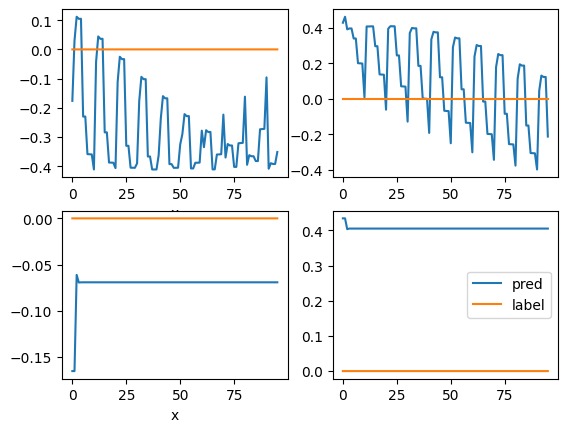

182 192
tensor([-1.4371e-08,  5.8039e-07,  2.8324e-05]) tensor([-1.4371e-08,  5.8039e-07,  2.8324e-05])
tensor([-1.4352e-08,  5.7295e-07,  2.8326e-05]) tensor([-1.4352e-08,  5.7295e-07,  2.8326e-05])
tensor([2.3510e-07, 5.1484e-07, 2.8329e-05]) tensor([2.3510e-07, 5.1484e-07, 2.8329e-05])
tensor([2.3271e-07, 5.1014e-07, 2.8329e-05]) tensor([2.3271e-07, 5.1014e-07, 2.8329e-05])
tensor([2.3094e-07, 5.0772e-07, 2.8328e-05]) tensor([2.3094e-07, 5.0772e-07, 2.8328e-05])
tensor([2.3098e-07, 5.0766e-07, 2.8327e-05]) tensor([2.3098e-07, 5.0766e-07, 2.8327e-05])
tensor([-2.3094e-07,  5.1093e-07,  2.8326e-05]) tensor([-2.3094e-07,  5.1093e-07,  2.8326e-05])
tensor([-2.3249e-07,  5.1530e-07,  2.8325e-05]) tensor([-2.3249e-07,  5.1530e-07,  2.8325e-05])
tensor([-4.4355e-07,  3.5908e-07,  2.8325e-05]) tensor([-4.4355e-07,  3.5908e-07,  2.8325e-05])
tensor([-4.4849e-07,  3.6137e-07,  2.8326e-05]) tensor([-4.4849e-07,  3.6137e-07,  2.8326e-05])
tensor([-4.5266e-07,  3.6291e-07,  2.8327e-05]) tensor([

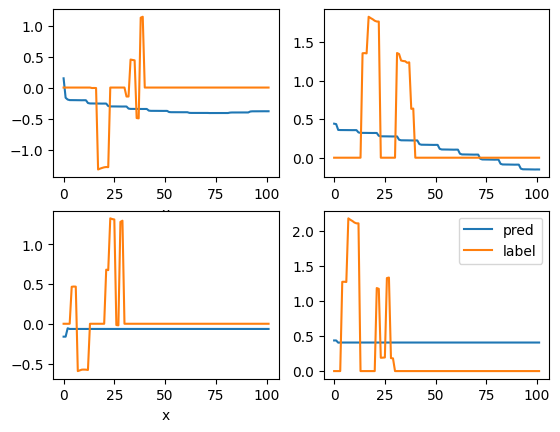

105 115
tensor([-2.1284e-07,  5.6413e-07,  2.8141e-05]) tensor([-2.1284e-07,  5.6413e-07,  2.8141e-05])
tensor([-2.1475e-07,  5.7028e-07,  2.8143e-05]) tensor([-2.1475e-07,  5.7028e-07,  2.8143e-05])
tensor([-2.1654e-07,  5.7556e-07,  2.8146e-05]) tensor([-2.1654e-07,  5.7556e-07,  2.8146e-05])
tensor([-0.0075,  1.3534,  0.9956]) tensor([-0.0075,  1.3534,  0.9956])
tensor([-0.0067,  1.3554,  0.9957]) tensor([-0.0067,  1.3554,  0.9957])
tensor([-0.0076,  1.3519,  0.9959]) tensor([-0.0076,  1.3519,  0.9959])
tensor([-1.3223,  1.8263,  0.9960]) tensor([-1.3223,  1.8263,  0.9960])
tensor([-1.3084,  1.8090,  0.9961]) tensor([-1.3084,  1.8090,  0.9961])
tensor([-1.2968,  1.7941,  0.9963]) tensor([-1.2968,  1.7941,  0.9963])
tensor([-1.2871,  1.7747,  0.9963]) tensor([-1.2871,  1.7747,  0.9963])
tensor([-1.2825,  1.7648,  0.9963]) tensor([-1.2825,  1.7648,  0.9963])
tensor([-1.2848,  1.7641,  0.9963]) tensor([-1.2848,  1.7641,  0.9963])
tensor([-5.2464e-07,  2.7773e-07,  2.8172e-05]) tensor([

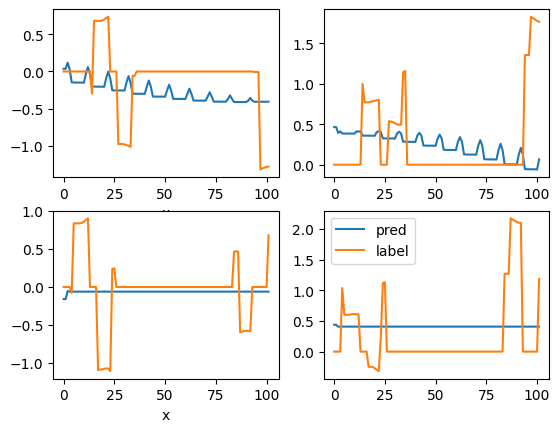

147 157
tensor([-5.5188e-07,  2.3948e-07,  2.8252e-05]) tensor([-5.5188e-07,  2.3948e-07,  2.8252e-05])
tensor([-5.5772e-07,  2.4050e-07,  2.8255e-05]) tensor([-5.5772e-07,  2.4050e-07,  2.8255e-05])
tensor([-5.6322e-07,  2.4160e-07,  2.8258e-05]) tensor([-5.6322e-07,  2.4160e-07,  2.8258e-05])
tensor([-5.6717e-07,  2.4115e-07,  2.8261e-05]) tensor([-5.6717e-07,  2.4115e-07,  2.8261e-05])
tensor([-5.6916e-07,  2.3889e-07,  2.8265e-05]) tensor([-5.6916e-07,  2.3889e-07,  2.8265e-05])
tensor([-5.6869e-07,  2.3457e-07,  2.8269e-05]) tensor([-5.6869e-07,  2.3457e-07,  2.8269e-05])
tensor([-5.6481e-07,  2.2897e-07,  2.8273e-05]) tensor([-5.6481e-07,  2.2897e-07,  2.8273e-05])
tensor([-5.5885e-07,  2.2402e-07,  2.8275e-05]) tensor([-5.5885e-07,  2.2402e-07,  2.8275e-05])
tensor([-2.3938e-07,  5.4402e-07,  2.8279e-05]) tensor([-2.3938e-07,  5.4402e-07,  2.8279e-05])
tensor([-2.3788e-07,  5.3715e-07,  2.8283e-05]) tensor([-2.3788e-07,  5.3715e-07,  2.8283e-05])
tensor([-2.3762e-07,  5.3211e-07

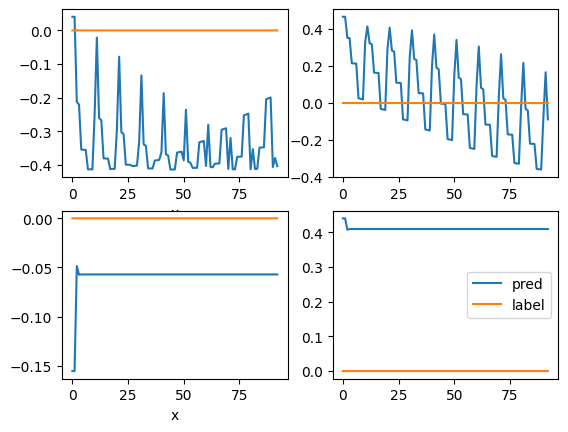

142 152
tensor([-2.3050e-07,  5.4968e-07,  2.8246e-05]) tensor([-2.3050e-07,  5.4968e-07,  2.8246e-05])
tensor([-2.3068e-07,  5.4530e-07,  2.8248e-05]) tensor([-2.3068e-07,  5.4530e-07,  2.8248e-05])
tensor([-2.3153e-07,  5.4384e-07,  2.8249e-05]) tensor([-2.3153e-07,  5.4384e-07,  2.8249e-05])
tensor([-2.3286e-07,  5.4486e-07,  2.8249e-05]) tensor([-2.3286e-07,  5.4486e-07,  2.8249e-05])
tensor([-5.4606e-07,  2.3944e-07,  2.8250e-05]) tensor([-5.4606e-07,  2.3944e-07,  2.8250e-05])
tensor([-5.5188e-07,  2.3948e-07,  2.8252e-05]) tensor([-5.5188e-07,  2.3948e-07,  2.8252e-05])
tensor([-5.5772e-07,  2.4050e-07,  2.8255e-05]) tensor([-5.5772e-07,  2.4050e-07,  2.8255e-05])
tensor([-5.6322e-07,  2.4160e-07,  2.8258e-05]) tensor([-5.6322e-07,  2.4160e-07,  2.8258e-05])
tensor([-5.6717e-07,  2.4115e-07,  2.8261e-05]) tensor([-5.6717e-07,  2.4115e-07,  2.8261e-05])
tensor([-5.6916e-07,  2.3889e-07,  2.8265e-05]) tensor([-5.6916e-07,  2.3889e-07,  2.8265e-05])
tensor([-5.6869e-07,  2.3457e-07

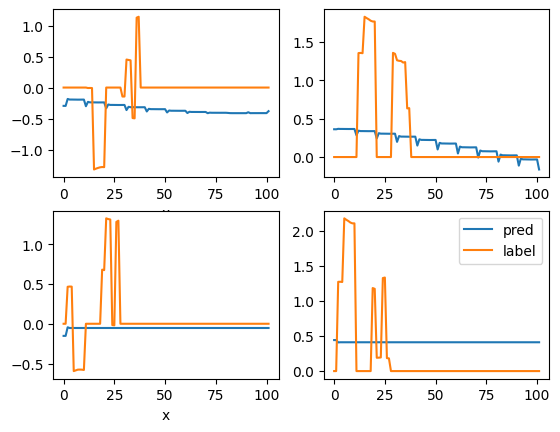

159 169
tensor([-2.3885e-07,  5.3066e-07,  2.8285e-05]) tensor([-2.3885e-07,  5.3066e-07,  2.8285e-05])
tensor([-2.4119e-07,  5.3436e-07,  2.8286e-05]) tensor([-2.4119e-07,  5.3436e-07,  2.8286e-05])
tensor([-2.4403e-07,  5.3929e-07,  2.8287e-05]) tensor([-2.4403e-07,  5.3929e-07,  2.8287e-05])
tensor([-2.4649e-07,  5.4431e-07,  2.8288e-05]) tensor([-2.4649e-07,  5.4431e-07,  2.8288e-05])
tensor([-2.4894e-07,  5.4938e-07,  2.8290e-05]) tensor([-2.4894e-07,  5.4938e-07,  2.8290e-05])
tensor([-2.5071e-07,  5.5302e-07,  2.8293e-05]) tensor([-2.5071e-07,  5.5302e-07,  2.8293e-05])
tensor([-2.5190e-07,  5.5309e-07,  2.8297e-05]) tensor([-2.5190e-07,  5.5309e-07,  2.8297e-05])
tensor([-2.5264e-07,  5.5052e-07,  2.8300e-05]) tensor([-2.5264e-07,  5.5052e-07,  2.8300e-05])
tensor([-2.5176e-07,  5.4527e-07,  2.8303e-05]) tensor([-2.5176e-07,  5.4527e-07,  2.8303e-05])
tensor([-2.4965e-07,  5.3807e-07,  2.8305e-05]) tensor([-2.4965e-07,  5.3807e-07,  2.8305e-05])
tensor([-2.4744e-07,  5.3038e-07

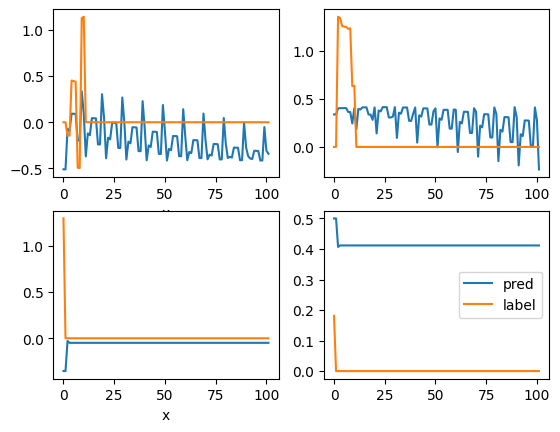

117 127
tensor([-5.2464e-07,  2.7773e-07,  2.8172e-05]) tensor([-5.2464e-07,  2.7773e-07,  2.8172e-05])
tensor([-5.2955e-07,  2.7975e-07,  2.8173e-05]) tensor([-5.2955e-07,  2.7975e-07,  2.8173e-05])
tensor([-5.3546e-07,  2.8225e-07,  2.8174e-05]) tensor([-5.3546e-07,  2.8225e-07,  2.8174e-05])
tensor([-2.2046e-07,  5.7101e-07,  2.8177e-05]) tensor([-2.2046e-07,  5.7101e-07,  2.8177e-05])
tensor([-2.2209e-07,  5.7666e-07,  2.8180e-05]) tensor([-2.2209e-07,  5.7666e-07,  2.8180e-05])
tensor([-2.2375e-07,  5.8007e-07,  2.8184e-05]) tensor([-2.2375e-07,  5.8007e-07,  2.8184e-05])
tensor([-2.2505e-07,  5.8089e-07,  2.8189e-05]) tensor([-2.2505e-07,  5.8089e-07,  2.8189e-05])
tensor([-2.2543e-07,  5.7873e-07,  2.8193e-05]) tensor([-2.2543e-07,  5.7873e-07,  2.8193e-05])
tensor([-0.1448,  1.3563,  0.9972]) tensor([-0.1448,  1.3563,  0.9972])
tensor([-0.1449,  1.3436,  0.9973]) tensor([-0.1449,  1.3436,  0.9973])
tensor([0.4521, 1.2596, 0.9975]) tensor([0.4521, 1.2596, 0.9975])
tensor([0.4454

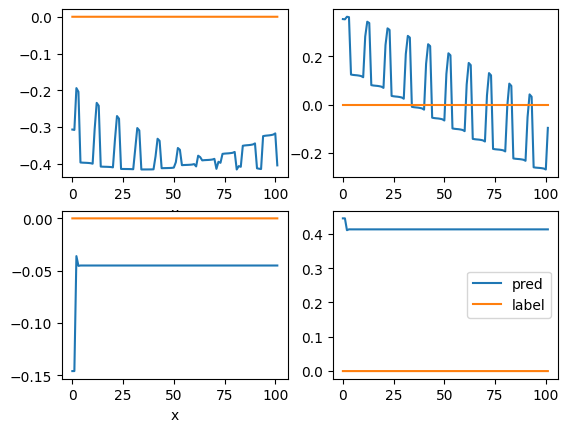

26 36
tensor([-1.2282e-07,  5.2402e-07,  2.8146e-05]) tensor([-1.2282e-07,  5.2402e-07,  2.8146e-05])
tensor([-1.2298e-07,  5.1975e-07,  2.8144e-05]) tensor([-1.2298e-07,  5.1975e-07,  2.8144e-05])
tensor([-0.2989,  0.9976,  0.9955]) tensor([-0.2989,  0.9976,  0.9955])
tensor([0.6844, 0.7722, 0.9954]) tensor([0.6844, 0.7722, 0.9954])
tensor([0.6834, 0.7679, 0.9952]) tensor([0.6834, 0.7679, 0.9952])
tensor([0.6822, 0.7707, 0.9951]) tensor([0.6822, 0.7707, 0.9951])
tensor([0.6836, 0.7756, 0.9949]) tensor([0.6836, 0.7756, 0.9949])
tensor([0.6858, 0.7833, 0.9947]) tensor([0.6858, 0.7833, 0.9947])
tensor([0.7013, 0.7887, 0.9946]) tensor([0.7013, 0.7887, 0.9946])
tensor([0.7232, 0.7936, 0.9945]) tensor([0.7232, 0.7936, 0.9945])
tensor([0.7387, 0.8001, 0.9944]) tensor([0.7387, 0.8001, 0.9944])
tensor([1.3365e-07, 5.4173e-07, 2.8117e-05]) tensor([1.3365e-07, 5.4173e-07, 2.8117e-05])
tensor([-1.4488e-07,  5.4265e-07,  2.8116e-05]) tensor([-1.4488e-07,  5.4265e-07,  2.8116e-05])
tensor([-1.4625e

KeyboardInterrupt: 

In [61]:
! wandb disabled
from copy import deepcopy


import numpy as np

import torch

import os;

import torch
import torch.nn.functional as F
from torch.optim.adam import Adam

from tggnn.data.typed_graph import TypedGraph
from tggnn.model.stateful import StatefulModel

from models.common import Checkpoint
from models.bubble.args import bubble_model_args
from models.bubble.impl.memory import bubble_memory_model, center_memory

from experimental.remesh.bubble import Bubble, rotation_matrix_to_y_axis, rotation_matrix_to_diag
from experimental.remesh.sequence_dataset import BubbleSequenceDataset, BubbleSequence

import torch.nn as nn

import wandb

from loky import get_reusable_executor


# # start a new wandb run to track this script
# wandb.init(
#     # set the wandb project where this run will be logged
#     project="thesis-tteulings",
    
#     # track hyperparameters and run metadata
#     config={
#     "architecture": "Fixed predicted input, only backpropagate end",
#     'center_predictions' : True,
#     **vars(args),
#     }
# )
# Load the bubble trajectory dataset.

transform =None

# Setup the network
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device = 'cpu'


# model = AutoregressiveRNN(3, 20, 3)

model.to(device)
# state.to(device)



optimizer = Adam(
    model.parameters(), lr=0.0001
)

# optimizer = VectorAdam([{'params': model.parameters(), 'axis': -1}], lr=args.learning_rate)



print("{:-<80}".format(""))
print("Epoch{:2}Train loss{:8}Time".format(" ", " "))
print("{:-<80}".format(""))


torch.cuda.empty_cache()
model.train()


# wandb.watch(model, log_freq=2, log='all')

# Run model epochs
def train(
    model: StatefulModel[Bubble, TypedGraph],
    state: TypedGraph,
    gather_statistics: bool,
) -> None:
    epoch_start = model.epoch

    tot_seq = 0
    while True:
        # print()
        for si in [1]:
   
            

            outputs = []
            targets = []
            preds = []
            preds_pure = []
            vels_pred = []
            vels_target = []

            # model.zero_grad()
            hidden = None

            # model.zero_grad()
            n = 300
            k= 100
            s = np.random.randint(1, n-k + 1)  # Randomly choose start point
            # print(s+n)
            loss = torch.tensor([0.0], device=device)

            rotation_matrix = np.diag([1.0,1.0,1.0])

            sequence_list = loaded_sequences[si]

            warmup = 11
            initial_bubble = sequence_list[0]

            if not model.normalizer.active:
                for j in range(s+1, n):
                                    # rotation_matrix = torch.tensor(rotation_matrix_to_y_axis(model.normalizer.normalize(sequence_list[j-1].center_target)))

                    rotation_matrix = rotation_matrix_to_y_axis(sequence_list[j-10].center_target)

                    # model.normalizer.update( get_bubble(i, si,normalizer_rotation_matrix).center_target)
                    print(sequence_list[j].center_target)
                    model.normalizer.update(sequence_list[j].center_target)

            print(s+1, s+warmup)
            vels_target = [model.normalizer.normalize(sequence_list[i].center_target) for i in range(s+1, s+warmup)]
            # print(vels_target)
            vels_pred = deepcopy(vels_target)

            init_seq = torch.empty((0,3))
            targets = []


            for j in range(s+1, n):
                bubble = sequence_list[j]
                
                # rotation_matrix = torch.tensor(rotation_matrix_to_y_axis(vels_target[np.clip((j-(s+1))-10, )]))
                rotation_matrix = torch.tensor(rotation_matrix_to_y_axis(model.normalizer.normalize(sequence_list[j-10].center_target)))

                if (j-s) < warmup:
                    out_vel = torch.tensor(rotation_matrix).float()@model.normalizer.normalize(bubble.center_target)
                    init_seq = torch.cat((init_seq, out_vel.reshape(1,3)), axis=0)
                else:
                    targets.append(rotation_matrix.float()@model.normalizer.normalize(sequence_list[j].center_target))
                    vels_target.append(model.normalizer.normalize(sequence_list[j].center_target))
                    print(sequence_list[j].center_target, sequence_list[j].center_target)
                # print(vels_target,rotation_matrix)
            current = initial_bubble
            current.to(device)

            # print(targets)
                # print(init_seq)

            # print(out_vel, init_seq[-2:])
            for (count, bubble_n) in enumerate(range(s+warmup+1, n)):
                # print(vels_pred)
                # print(bubble_n)
                bubble = sequence_list[bubble_n]
                bubble.to(device)
                # print(vels_pred[-1])

                rotation_matrix = rotation_matrix_to_y_axis(vels_pred[-10].detach().numpy())
                out_vel, hidden = model(init_seq, out_vel.reshape((1,3)), hidden)
                # print(out_vel)
                preds.append((torch.tensor(rotation_matrix.T).float()@out_vel[0]))

                # wandb.log({'epoch':model.epoch,'centroid': hidden.cpu().detach().numpy()[0]})

                outputs.append(out_vel.reshape(3))
                # targets.append(model.normalizer.normalize(bubble.center_target).reshape(3))

                error = ((model.normalizer.normalize(bubble.center_target).to(device)-out_vel.reshape(3))**2)
                # print(error)

                if count % 1000 == 0:

                    # vels.append(labels[i].detach().numpy())
                    vels_pred.append(model.normalizer.normalize(bubble.center_target))
                    out_vel=        targets[count].reshape(1,3)
                    # print(model.normalizer.normalize(bubble.center_target))
                    # print(torch.tensor(rotation_matrix).float()@model.normalizer.normalize(bubble.center_target))
                    # preds_pure.append(torch.tensor(rotation_matrix).float()@model.normalizer.normalize(bubble.center_target))
                else:
                    vels_pred.append(preds[-1])



                # wandb.log({'u': u, 'loss_x': error[0], 'loss_y': error[1], 'loss_z': error[2], 'epoch': model.epoch, 'bubble_num': si+1, "loss": loss, 'onestepcenterloss': one_step_center_loss})

                # vel_pred = (out_vel).reshape(3)
                # vel_true = model.normalizer.normalize(bubble.center_target).to(device)

                # wandb.log({'u': u, 'loss_x': error[0], 'loss_y': error[1], 'loss_z': error[2], 'epoch': model.epoch, 'bubble_num': si+1,  'velocity_centroid_x': vel_pred[ 0], 'velocity_centroid_y': vel_pred[1], 'velocity_centroid_z': vel_pred[ 2], 'true_velocity_centroid_x': vel_true[ 0], 'true_velocity_centroid_y': vel_true[1], 'true_velocity_centroid_z': vel_true[ 2]})
                
  
                del bubble
                if model.epoch - epoch_start >= args.epochs:
                    return

                if count > k or count >= len(targets)-1:
        
                    break
            # print(tot_seq,ui)
      
            if len(outputs) == 0:
                continue
            loss = 0
            for output, target in list(zip(outputs, targets[:len(outputs)])):
                # print(output, target)
                
                loss += loss_function(output*torch.tensor([50, 1, 1]), torch.tensor(target).float()*torch.tensor([50, 1, 1])) / len(outputs)

            # print(loss)

            # wandb.log({'tot_seq':tot_seq, 'loss_tot': loss})
            loss.backward()

            nn.utils.clip_grad_norm_(model.parameters(), max_norm=.01)
            optimizer.step()
            model.zero_grad()

            if tot_seq % 10 == 0:
                # print(vels_pred)
                # print(len(targets), len(preds))
                torch.save(model, 'trained_model')
                predz = torch.stack(outputs)
                targetz = torch.stack(targets[:len(preds)])
                # print(targetz.shape)

                # print(predz.shape)

                vels_predz = torch.stack(preds)
                vels_targetz = torch.stack(vels_target[:len(preds)])
                # print(init_seq)
                # print(init_seq[:, 2])
                ax = plt.subplot(2,2,1)
                # plt.plot(labels[:len(preds), 0], labels[:len(preds), 1], label='label')
                ax.plot(vels_predz[:, 0].detach().numpy(), label='pred', zorder=2)
                ax.plot(vels_targetz[:, 0], label='label')
                # ax.plot(range(-99, 0), init_seq[:, 0], label='init')

                ax.set_xlabel('x')
                
                
                ax = plt.subplot(2,2,2)
                ax.plot(vels_predz[:, 1].detach().numpy(), label='pred')
                ax.plot(vels_targetz[:, 1], label='label')

                ax = plt.subplot(2,2,3)
                # plt.plot(labels[:len(preds), 0], labels[:len(preds), 1], label='label')
                ax.plot(predz[:, 0].detach().numpy(), label='pred', zorder=2)
                ax.plot(targetz[:, 0], label='label')
                ax.plot(range(-len(init_seq)+50, 0), init_seq[50:, 0], label='init')

                ax.set_xlabel('x')
                
                
                ax = plt.subplot(2,2,4)

                ax.plot(predz[:, 1].detach().numpy(), label='pred')
                ax.plot(targetz[:, 1], label='label')
                
                # ax.set_xlabel('x')
                plt.legend()
                plt.show()
            # print(init_seq)

            tot_seq += 1


        if tot_seq % 10 == 0:
            print("LOSS:", loss)

        model.epoch += 1


train(model, None, None)


# Complete model


In [21]:

class WelfordNormalizer:
    def __init__(self):
        self.k = 1
        self.M = torch.tensor([-3.5681e-09,  1.2434e-06,  2.8165e-05])
        self.S = torch.zeros(3)
        self.active = False
        self.x_max = torch.full((3,), float('-inf'))
        self.x_min = torch.full((3,), float('inf'))

    def update(self, x):
        # Update maximum and minimum values
        self.x_max = torch.max(self.x_max, x)
        self.x_min = torch.min(self.x_min, x)

        if self.k >= 1000:
            return
        self.k += 1
        oldM = self.M.clone()
        self.M += (x - self.M) / self.k
        self.S += (x - oldM) * (x - self.M)
        self.active=True

    def mean(self):
        return self.M

    def variance(self):
        if self.k > 1:
            return self.S / (self.k - 1)
        else:
            return torch.full((3,), float('nan'))

    def std_dev(self):
        return torch.sqrt(self.variance())

    def normalize(self, x):
        return x
        abs_max = torch.max(self.x_max.abs(), self.x_min.abs())
        return x / abs_max

    def inverse(self, x):
        abs_max = torch.max(self.x_max.abs(), self.x_min.abs())
        return x * abs_max


In [25]:
from copy import deepcopy
from models.bubble.impl.memory import bubble_memory_model, center_memory

# Load the bubble trajectory dataset.
dataset = BubbleSequenceDataset(
    args.data_directory,
    # transforms=[RelativeNoiseTransform(args.noise)]
    # if args.noise is not None
    # else None,
    remesh_velocity=args.remesh_velocity,
    target_acceleration=args.target_acceleration,
    center_prediction = True,
    # ignore_sequences=[1, 2,3,4,5,6,7,8]
    start_point=2
)


class CompleteModel(nn.Module):   
    def __init__(self, *args, **kwargs) -> None:
        super().__init__(*args, **kwargs) 
        self.bubble_model, self.hidden_state = bubble_memory_model(dataset.layout(),64, 2, 2)
        self.hidden_init_model, self.init_hidden_state = bubble_memory_model(dataset.layout(),64, 2, 2)

        self.linear_out = nn.Linear(2*3, 2*3)
        self.linear_out2 = nn.Linear(2*3, 3)

        self.linear_out_edge = nn.Linear(2*3, 2*3)
        self.linear_out2_edge = nn.Linear(2*3, 3)
        self.relu = torch.nn.LeakyReLU()

        self.epoch = 0
        self.normalizer=WelfordNormalizer()

    def forward(self, init_sequence, bubble_i, hidden_state=None):
        if hidden_state is None:
            for bubble in init_sequence:
                out, self.init_hidden_state, center_out = self.hidden_init_model.forward(
                    deepcopy(bubble), center_memory(bubble, self.init_hidden_state)
                )

            self.hidden_state = self.init_hidden_state
        out, self.init_hidden_state, center_out = self.hidden_init_model.forward(
            deepcopy(bubble_i), center_memory(bubble_i, self.init_hidden_state)
        )

        x = bubble.center_velocity
        x_edge = bubble.velocities

        output = self.linear_out(torch.cat((center_out, x), axis=1))
        output= self.linear_out2(output)


        edge_output = self.linear_out_edge(torch.cat((out, x_edge), axis=1))
        edge_output= self.linear_out2_edge(output)

        return output, edge_output
    
model = CompleteModel()

2
update
update
update
2
update
update
update


In [28]:
! wandb disabled
from copy import deepcopy

import numpy as np

import torch

import torch
import torch.nn.functional as F
from torch.optim.adam import Adam

from tggnn.data.typed_graph import TypedGraph
from tggnn.model.stateful import StatefulModel

from models.common import Checkpoint
from models.bubble.args import bubble_model_args
from models.bubble.impl.memory import bubble_memory_model, center_memory

from experimental.remesh.bubble import Bubble, rotation_matrix_to_y_axis, rotation_matrix_to_diag
from experimental.remesh.sequence_dataset import BubbleSequenceDataset, BubbleSequence

import torch.nn as nn

import wandb

from loky import get_reusable_executor


# # start a new wandb run to track this script
# wandb.init(
#     # set the wandb project where this run will be logged
#     project="thesis-tteulings",
    
#     # track hyperparameters and run metadata
#     config={
#     "architecture": "Fixed predicted input, only backpropagate end",
#     'center_predictions' : True,
#     **vars(args),
#     }
# )

# Setup the network
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device = 'cpu'



model.to(device)


optimizer = Adam(
    model.parameters(), lr=0.0001
)

# optimizer = VectorAdam([{'params': model.parameters(), 'axis': -1}], lr=args.learning_rate)



print("{:-<80}".format(""))
print("Epoch{:2}Train loss{:8}Time".format(" ", " "))
print("{:-<80}".format(""))


torch.cuda.empty_cache()
model.train()
n = 300
k= 100
warmup = 10

# wandb.watch(model, log_freq=2, log='all')

# Run model epochs
def train(
    model: StatefulModel[Bubble, TypedGraph],
    state: TypedGraph,
    gather_statistics: bool,
) -> None:
    epoch_start = model.epoch

    tot_seq = 0
    while True:
        # print()
        for si in [1]:

            outputs = []
            targets = []
            preds = []
            preds_pure = []
            vels_pred = []
            vels_target = []

            # model.zero_grad()
            hidden = None

            # model.zero_grad()

            s = np.random.randint(1, n-k + 1) 


             # Randomly choose start point
            # print(s+n)
            loss = torch.tensor([0.0], device=device)

            rotation_matrix = np.diag([1.0,1.0,1.0])

            sequence_list = loaded_sequences[si]


            initial_bubble = sequence_list[0]

            if not model.normalizer.active:
                for j in range(s+1, s+warmup):
                                    # rotation_matrix = torch.tensor(rotation_matrix_to_y_axis(model.normalizer.normalize(sequence_list[j-1].center_target)))

                    rotation_matrix = rotation_matrix_to_y_axis(sequence_list[j-10].center_target)

                    # model.normalizer.update( get_bubble(i, si,normalizer_rotation_matrix).center_target)
                    model.normalizer.update(sequence_list[j].center_target)

            print(s+1, s+warmup)
            vels_target = [model.normalizer.normalize(sequence_list[i].center_target) for i in range(s+1, s+warmup)]
            vels_pred = deepcopy(vels_target)

            init_seq = torch.empty((0,3))
            init_bubbles = []
            targets = []


            for j in range(s+1, n):
                bubble = sequence_list[j]
                
                # rotation_matrix = torch.tensor(rotation_matrix_to_y_axis(vels_target[np.clip((j-(s+1))-10, )]))
                rotation_matrix = torch.tensor(rotation_matrix_to_y_axis(sequence_list[j-10].center_target))

                if (j-s) < warmup:
                    out_vel = torch.tensor(rotation_matrix).float()@model.normalizer.normalize(bubble.center_target)
                    # out_vel = torch.tensor(rotation_matrix).float()@bubble.center_target

                    init_seq = torch.cat((init_seq, out_vel.reshape(1,3)), axis=0)
                    # print(model.normalizer.normalize(bubble.center_velocity), out_vel)
                    # print(rotation_matrix)
                    print(bubble.center_target,)
                    # bubble.center_target = model.normalizer.normalize(bubble.center_target)
                    rotated_bubble = bubble.rotate(rotation_matrix.T)
                    print(rotated_bubble.center_target, out_vel)
                    init_bubbles.append(bubble)
                else:
                    targets.append(rotation_matrix.float()@model.normalizer.normalize(sequence_list[j].center_target))
                    vels_target.append(model.normalizer.normalize(sequence_list[j].center_target))

                # print(vels_target,rotation_matrix)
            current = initial_bubble
            current.to(device)

       
            for (count, bubble_n) in enumerate(range(s+warmup+1, n)):




                bubble = sequence_list[bubble_n]
                bubble.to(device)
                
                
                current.remesh(bubble.instructions)
                current.labels["target"] = bubble.labels["target"]

                current.center_target = bubble.center_target



                rotation_matrix = rotation_matrix_to_y_axis(vels_pred[-10].detach().numpy())
                center_out, edge_out = model(init_seq, out_vel.reshape((1,3)))
                # print(out_vel)
                preds.append((torch.tensor(rotation_matrix.T).float()@out_vel[0]))

                # wandb.log({'epoch':model.epoch,'centroid': hidden.cpu().detach().numpy()[0]})

                outputs.append(out_vel.reshape(3))
                # targets.append(model.normalizer.normalize(bubble.center_target).reshape(3))

                error = ((model.normalizer.normalize(bubble.center_target).to(device)-out_vel.reshape(3))**2)
                # print(error)

                if count % 1000 == 0:
                    current.update(
                                model.normalizer.inverse(pred.detach()), False, center_out.detach() / center_normalizer.to(center_out.device)
                            )
                    # vels.append(labels[i].detach().numpy())
                    vels_pred.append(model.normalizer.normalize(bubble.center_target))
                    out_vel=        targets[count].reshape(1,3)
                    # print(model.normalizer.normalize(bubble.center_target))
                    # print(torch.tensor(rotation_matrix).float()@model.normalizer.normalize(bubble.center_target))
                    # preds_pure.append(torch.tensor(rotation_matrix).float()@model.normalizer.normalize(bubble.center_target))
                else:
                    vels_pred.append(preds[-1])



                # wandb.log({'u': u, 'loss_x': error[0], 'loss_y': error[1], 'loss_z': error[2], 'epoch': model.epoch, 'bubble_num': si+1, "loss": loss, 'onestepcenterloss': one_step_center_loss})

                # vel_pred = (out_vel).reshape(3)
                # vel_true = model.normalizer.normalize(bubble.center_target).to(device)

                # wandb.log({'u': u, 'loss_x': error[0], 'loss_y': error[1], 'loss_z': error[2], 'epoch': model.epoch, 'bubble_num': si+1,  'velocity_centroid_x': vel_pred[ 0], 'velocity_centroid_y': vel_pred[1], 'velocity_centroid_z': vel_pred[ 2], 'true_velocity_centroid_x': vel_true[ 0], 'true_velocity_centroid_y': vel_true[1], 'true_velocity_centroid_z': vel_true[ 2]})
                
  
                del bubble
                if model.epoch - epoch_start >= args.epochs:
                    return

                if count > k or count >= len(targets)-1:
        
                    break
            # print(tot_seq,ui)
      
            if len(outputs) == 0:
                continue
            loss = 0
            for output, target in list(zip(outputs, targets[:len(outputs)])):
                # print(output, target)
                
                loss += loss_function(output*torch.tensor([50, 1, 1]), torch.tensor(target).float()*torch.tensor([50, 1, 1])) / len(outputs)

            # print(loss)

            # wandb.log({'tot_seq':tot_seq, 'loss_tot': loss})
            loss.backward()

            nn.utils.clip_grad_norm_(model.parameters(), max_norm=.01)
            optimizer.step()
            model.zero_grad()

            if tot_seq % 10 == 0:
                # print(vels_pred)
                # print(len(targets), len(preds))
                torch.save(model, 'trained_model')
                predz = torch.stack(outputs)
                targetz = torch.stack(targets[:len(preds)])
                # print(targetz.shape)

                # print(predz.shape)

                vels_predz = torch.stack(preds)
                vels_targetz = torch.stack(vels_target[:len(preds)])
                # print(init_seq)
                # print(init_seq[:, 2])
                ax = plt.subplot(2,2,1)
                # plt.plot(labels[:len(preds), 0], labels[:len(preds), 1], label='label')
                ax.plot(vels_predz[:, 0].detach().numpy(), label='pred', zorder=2)
                ax.plot(vels_targetz[:, 0], label='label')
                # ax.plot(range(-99, 0), init_seq[:, 0], label='init')

                ax.set_xlabel('x')
                
                
                ax = plt.subplot(2,2,2)
                ax.plot(vels_predz[:, 1].detach().numpy(), label='pred')
                ax.plot(vels_targetz[:, 1], label='label')

                ax = plt.subplot(2,2,3)
                # plt.plot(labels[:len(preds), 0], labels[:len(preds), 1], label='label')
                ax.plot(predz[:, 0].detach().numpy(), label='pred', zorder=2)
                ax.plot(targetz[:, 0], label='label')
                ax.plot(range(-len(init_seq)+50, 0), init_seq[50:, 0], label='init')

                ax.set_xlabel('x')
                
                
                ax = plt.subplot(2,2,4)

                ax.plot(predz[:, 1].detach().numpy(), label='pred')
                ax.plot(targetz[:, 1], label='label')
                
                # ax.set_xlabel('x')
                plt.legend()
                plt.show()
            # print(init_seq)

            tot_seq += 1


        if tot_seq % 10 == 0:
            print("LOSS:", loss)

        model.epoch += 1


train(model, None, None)


W&B disabled.
--------------------------------------------------------------------------------
Epoch  Train loss        Time
--------------------------------------------------------------------------------
18 27
tensor([-1.0086e-07,  5.0588e-07,  2.8191e-05])
tensor([-4.7104e-07, -2.1026e-07,  2.8191e-05]) tensor([-4.7104e-07, -2.1026e-07,  2.8191e-05])
tensor([-5.1861e-07,  4.1473e-08,  2.8189e-05])
tensor([ 7.5439e-08, -5.1477e-07,  2.8189e-05]) tensor([ 7.5439e-08, -5.1477e-07,  2.8189e-05])
tensor([-3.0317e-07,  4.2579e-07,  2.8187e-05])
tensor([-4.3441e-07,  2.9068e-07,  2.8187e-05]) tensor([-4.3441e-07,  2.9068e-07,  2.8187e-05])
tensor([-3.0529e-07,  4.2432e-07,  2.8186e-05])
tensor([-4.3713e-07,  2.8665e-07,  2.8186e-05]) tensor([-4.3713e-07,  2.8665e-07,  2.8186e-05])
tensor([1.1703e-07, 5.0696e-07, 2.8184e-05])
tensor([2.1275e-07, 4.7481e-07, 2.8184e-05]) tensor([2.1275e-07, 4.7481e-07, 2.8184e-05])
tensor([1.1756e-07, 5.0283e-07, 2.8182e-05])
tensor([2.1347e-07, 4.7020e-07, 

/tmp/ipykernel_176933/1155699274.py:136: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  out_vel = torch.tensor(rotation_matrix).float()@model.normalizer.normalize(bubble.center_target)
/home/tijs/thesis/mirror/tggnn/experimental/remesh/bubble.py:348: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.rotation_tensor = torch.tensor(rotation_matrix, device=self.velocity.device)


RuntimeError: expected scalar type Float but found Double

In [182]:
model.requires_grad_()

SineWavePredictor(
  (init_rnn): LSTM(3, 32)
  (rnn): LSTM(3, 32, batch_first=True)
  (linear): Linear(in_features=32, out_features=3, bias=True)
  (linear_out): Linear(in_features=6, out_features=6, bias=True)
  (linear_out2): Linear(in_features=6, out_features=3, bias=True)
  (hidden_init_layer): Linear(in_features=3, out_features=32, bias=True)
  (cell_init_layer): Linear(in_features=3, out_features=32, bias=True)
  (relu): LeakyReLU(negative_slope=0.01)
)

In [ ]:
vel

In [ ]:
x = np.array([seq.center_target.detach().numpy() for seq in loaded_sequences[1]])

In [ ]:
x

array([tensor([-8.0823e-08,  4.6879e-07,  2.8250e-05]),
       tensor([-8.2873e-08,  4.7373e-07,  2.8245e-05]),
       tensor([-8.4551e-08,  4.7986e-07,  2.8240e-05]), ...,
       tensor([ 9.9503e-07, -3.7680e-07,  2.8279e-05]),
       tensor([ 9.8793e-07, -3.6633e-07,  2.8280e-05]),
       tensor([ 9.7719e-07, -3.5603e-07,  2.8281e-05])], dtype=object)

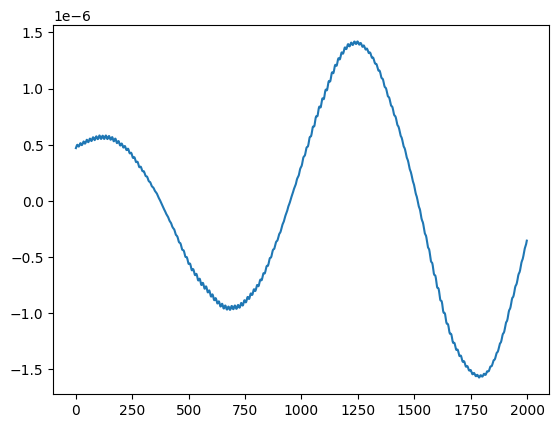

In [ ]:
plt.plot(x[:, 1])

In [ ]:

x=[1,2,3,5,6]

x[-1:5]

[6]

In [ ]:
class WelfordNormalizer:
    def __init__(self):
        self.k = 1
        self.M = torch.tensor([-3.5681e-09,  1.2434e-06,  2.8165e-05])
        self.S = torch.zeros(3)

        self.active = False
    
    def update(self, x):
        # print('update')

        if self.k >= 1000:
            return
        self.k += 1
        oldM = self.M.clone()
        self.M += (x - self.M) / self.k
        self.S += (x - oldM) * (x - self.M)
        self.active=True
    
    def mean(self):
        return self.M

    def variance(self):
        if self.k > 1:
            return self.S / (self.k - 1)
        else:
            return torch.full((3,), float('nan'))

    def std_dev(self):
        return torch.sqrt(self.variance())

    def normalize(self, x):
        return (x - self.mean()) / self.std_dev()

    def inverse(self, x):
        return x * self.std_dev() + self.mean()
    


class AutoregressiveRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(AutoregressiveRNN, self).__init__()

        self.hidden_size = hidden_size

        self.rnn = nn.GRUCell(input_size, hidden_size)

        self.rnn_hidden = nn.RNN(input_size, hidden_size)

        self.out = nn.Linear(hidden_size, hidden_size)
        self.out2 = nn.Linear(int(.5*hidden_size) + input_size, output_size)
        self.out3 = nn.Linear(hidden_size, int(.5*hidden_size))

        self.out_single = nn.Linear(hidden_size, input_size)
        self.out_single2 =  nn.Linear( input_size+input_size, input_size)

        self.init_hidden = nn.Linear(2*input_size, hidden_size)

        self.leaky = nn.LeakyReLU()
        self.epoch = 0

        self.normalizer=WelfordScaler()

    def forward(self, input, hidden):
        self.epoch += 1
        



        # output = self.leaky(hidden)
        # # print(torch.cat((output, input), 1))
        # output = self.out(output)
        # output = self.leaky(output)

        # output = self.out3(output)
        # output = self.leaky(output)

        # output = self.out2(torch.cat((output, input), 1))
        hidden = self.rnn(input, hidden.reshape((1, self.hidden_size)))
        self.leaky = nn.LeakyReLU()

        output = self.out_single(hidden)
        self.leaky = nn.LeakyReLU()
        output = self.out_single2(torch.cat((output, input), 1))
        return output, hidden.reshape(1,self.hidden_size)

    # def init_hidden(self, batch_size):
    #     return torch.zeros(1, self.hidden_size)

    # def rnn_hidden(self, hidden_rnn):
    #     self.rnn_hidden

    #     return ,hidden_rnn
